<a href="https://colab.research.google.com/github/bmorbin/flights-delay/blob/main/D%26N_Teste_de_Conhecimentos_em_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python-Based Data Knowledge Test

In this test, you will have the opportunity to demonstrate your data handling skills using the Python programming language.

The test will consist of 3 stages of knowledge assessment in the areas of:

- *** Data Engineering (ETL, Queries, Automated Ingestion and Extraction) ***
- *** Data Visualization and Data Analysis ***
- *** Machine Learning Model Training ***

The purpose is to assess your overall knowledge in these areas, so there's no issue if you're unable to complete some of the modules. The key is to focus on your strongest skills. However, remember that the more comprehensive the result of your case is, the better your final outcome will be.

Delivery time will be evaluated, as deadlines are one of the most important aspects. Therefore, know how to prioritize what should be delivered based on your skill set. Again, do not worry if you are unable to complete all activities.

You should download this notebook and then host it on Google Colab with your saved results displayed. The code will be re-executed to validate if the provided code generates the shown result.

# Dataset Info

To carry out the above stages, we will use the "2015 Flight Delays and Cancellations" dataset from Kaggle, which contains public flight data from the major American airlines.

To download the dataset, download these 3 files:
- [airlines.csv](https://drive.google.com/file/d/1RFGzwjNtvSQ1Isq1AJL60R0y7ll50okT/view)
- [airports.csv](https://drive.google.com/file/d/11NKHy78lyYl6az1MMXIPX2LPht9ITLxA/view)
- [flights.csv](https://drive.google.com/file/d/1-g2JCBREVYkpDVrkOd0wNCmDsSG-sqFR/view)

## About Dataset
### Context
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.

### Acknowledgements
The flight delay and cancellation data was collected and published by the DOT's Bureau of Transportation Statistics.

# 1. Data Engineering (ETL, Queries, Automated Ingestion and Extraction)

## Instructions for the ETL Task

1. Import the data from the 'airlines.csv', 'airports.csv', and 'flights.csv' files into the corresponding tables in the SQLite database.
2. Use SQL commands to transform and combine this data as needed.
3. Identify the top 5 airports with the highest number of delays. Consider departure delays ('DEPARTURE_DELAY').
4. Create a new table 'top_airports_delay' and insert the results of the previous query into this table.
5. Show the result of table in table or dataframe format.

In [1]:
# Ignore warnings to don't pollute the notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Installing necessary packages (restart session after run this block)

! pip install gdown==4.6.0 # Necessary to download large files from GoogleDrive
! gdown --version

! pip install dash

!pip install -U scikit-learn
!pip show scikit-learn

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
gdown 4.6.0 at /usr/local/lib/python3.10/dist-packages
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Name: scikit-learn
Version: 1.4.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [3]:
import sqlite3

# Create a connection to the SQLite database (created in memory for this example)
conn = sqlite3.connect(':memory:')

# Create a cursor to execute SQL commands
cursor = conn.cursor()

# Create tables for each of the CSV files
# Table for airlines.csv
cursor.execute('''
    CREATE TABLE airlines (
        IATA_CODE TEXT PRIMARY KEY,
        AIRLINE TEXT
    );
''')

# Table for airports.csv
cursor.execute('''
    CREATE TABLE airports (
        IATA_CODE TEXT PRIMARY KEY,
        AIRPORT TEXT,
        CITY TEXT,
        STATE TEXT,
        COUNTRY TEXT,
        LATITUDE REAL,
        LONGITUDE REAL
    );
''')

# Table for flights.csv
cursor.execute('''
    CREATE TABLE flights (
        YEAR INTEGER,
        MONTH INTEGER,
        DAY INTEGER,
        DAY_OF_WEEK INTEGER,
        AIRLINE TEXT,
        FLIGHT_NUMBER INTEGER,
        TAIL_NUMBER TEXT,
        ORIGIN_AIRPORT TEXT,
        DESTINATION_AIRPORT TEXT,
        SCHEDULED_DEPARTURE TEXT,
        DEPARTURE_TIME TEXT,
        DEPARTURE_DELAY REAL,
        TAXI_OUT REAL,
        WHEELS_OFF TEXT,
        SCHEDULED_TIME REAL,
        ELAPSED_TIME REAL,
        AIR_TIME REAL,
        DISTANCE INTEGER,
        WHEELS_ON TEXT,
        TAXI_IN REAL,
        SCHEDULED_ARRIVAL TEXT,
        ARRIVAL_TIME TEXT,
        ARRIVAL_DELAY REAL,
        DIVERTED INTEGER,
        CANCELLED INTEGER,
        CANCELLATION_REASON TEXT,
        AIR_SYSTEM_DELAY REAL,
        SECURITY_DELAY REAL,
        AIRLINE_DELAY REAL,
        LATE_AIRCRAFT_DELAY REAL,
        WEATHER_DELAY REAL
    );
''')


In [4]:
# Importing libraries
import pandas as pd
import gdown # version 4.6.0
import numpy as np

---
## 🕸 Extract data given by URL

Fixing the `gdown` library in version 4.6.0, it was possible to download the files by given URL. (Source: https://github.com/wkentaro/gdown/issues/43).

In [5]:
# Download the datasets into 'content' notebook folder
url_files = [
    ("https://drive.google.com/file/d/1RFGzwjNtvSQ1Isq1AJL60R0y7ll50okT/view", 'airlines.csv'),
    ("https://drive.google.com/file/d/11NKHy78lyYl6az1MMXIPX2LPht9ITLxA/view", 'airports.csv'),
    ("https://drive.google.com/file/d/1-g2JCBREVYkpDVrkOd0wNCmDsSG-sqFR/view", 'flights.csv')
    ]

for url, output in url_files:
  gdown.download(url=url, output=output,
                 quiet=False, fuzzy=True, use_cookies=False)

Downloading...
From: https://drive.google.com/uc?id=1RFGzwjNtvSQ1Isq1AJL60R0y7ll50okT
To: /content/airlines.csv
100%|██████████| 359/359 [00:00<00:00, 539kB/s]
Downloading...
From: https://drive.google.com/uc?id=11NKHy78lyYl6az1MMXIPX2LPht9ITLxA
To: /content/airports.csv
100%|██████████| 23.9k/23.9k [00:00<00:00, 35.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-g2JCBREVYkpDVrkOd0wNCmDsSG-sqFR
To: /content/flights.csv
100%|██████████| 592M/592M [00:04<00:00, 139MB/s]


---
## 📙 Airlines set

Dictionaray of features in the raw data (source in https://www.kaggle.com/datasets/usdot/flight-delays/data?select=airlines.csv):

*   `IATA_CODE`: Airline Identifier
*   `AIRLINE`: Airline's Name



In [6]:
rawdt_airlines = pd.read_csv('/content/airlines.csv')

rawdt_airlines.info()

display(rawdt_airlines.head()) # first 5 rows

print('Duplicated entries (just to verify):',sum(rawdt_airlines.duplicated()))

# Importing to SQL connection
rawdt_airlines.to_sql('airlines', conn, index=False, if_exists='replace')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


Duplicated entries (just to verify): 0


14

---
## 📙 Airports set

Dictionaray of features in the raw data (source in https://www.kaggle.com/datasets/usdot/flight-delays/data?select=airports.csv):

*   `IATA_CODE`: Location Identifier
*   `AIRPORT`: Airport's Name
*   `CITY`
*   `STATE`
*   `COUNTRY`: Country Name of the Airport
*   `LATITUDE`: Latitude of the Airport
*   `LONGITUDE`: Longitude of the Airport




In [7]:
rawdt_airports = pd.read_csv('/content/airports.csv')

rawdt_airports.info()

# first and last 5 rows
display(rawdt_airports.head())
display(rawdt_airports.tail())

print('Duplicated entries (just to verify):',sum(rawdt_airports.duplicated()))

# Verify believable latitude and longitude
rawdt_airports[-(rawdt_airports.LATITUDE.between(-180,+180,inclusive='both') &\
                 rawdt_airports.LONGITUDE.between(-180,+180,inclusive='both'))]

# By making a search (in Wikipedia) it's possible to find the missing coordinates:
missing_coordinates = [
  ('ECP',30.358333, -85.795556),
  ('PBG',44.650833, -73.468056),
  ('UST',29.95925, -81.339722)
]
rawdt_airports1 = rawdt_airports.copy()
for code, lat, lon in missing_coordinates:
  rawdt_airports1.loc[rawdt_airports['IATA_CODE']==code,['LATITUDE','LONGITUDE']] = [lat,lon]

# Importing to SQL connection
rawdt_airports1.to_sql('airports', conn, index=False, if_exists='replace')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


Duplicated entries (just to verify): 0


322

---
## 📙 Flights set

Dictionary of features (source: https://www.kaggle.com/datasets/usdot/flight-delays/data?select=flights.csv):

*   `YEAR`: Year of the Flight Trip
*   `MONTH`: Month of the Flight Trip
*   `DAY`: Day of the Flight Trip
*   `DAY_OF_WEEK`: Day of week of the Flight Trip
*   `AIRLINE`: Airline Identifier
*   `FLIGHT_NUMBER`: Flight Identifier
*   `TAIL_NUMBER`: Aircraft Identifier
*   `ORIGIN_AIRPORT`: Starting Airport
*   `DESTINATION_AIRPORT`: Destination Airport
*   `SCHEDULED_DEPARTURE`: **(HH:MM)** Planned Departure Time
*   `DEPARTURE_TIME`: **(HH:MM)** WHEEL_OFF - TAXI_OUT
*   `DEPARTURE_DELAY`: **(minutes)** Total Delay on Departure
*   `TAXI_OUT`: **(minutes)** The time duration elapsed between departure from the origin airport gate and wheels off
*   `WHEELS_OFF`: **(HH:MM)** The time point that the aircraft's wheels leave the ground
*   `SCHEDULED_TIME`: **(minutes)** Planned time amount needed for the flight trip
*   `ELAPSED_TIME`: **(minutes)** AIR_TIME+TAXI_IN+TAXI_OUT
*   `AIR_TIME`: **(minutes)** The time duration between wheels_off and wheels_on time
*   `DISTANCE`: Distance between two airports
*   `WHEELS_ON`: **(HH:MM)** The time point that the aircraft's wheels touch on the ground
*   `TAXI_IN`: **(minutes)** The time duration elapsed between wheels-on and gate arrival at the destination airport
*   `SCHEDULED_ARRIVAL`: **(HH:MM)** Planned arrival time
*   `ARRIVAL_TIME`: **(HH:MM)** WHEELS_ON+TAXI_IN
*   `ARRIVAL_DELAY`: **(minutes)** ARRIVAL_TIME-SCHEDULED_ARRIVAL
*   `DIVERTED`: Aircraft landed on airport that out of schedule
*   `CANCELLED`: Flight Cancelled (1 = cancelled)
*   `CANCELLATION_REASON`: Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
*   `AIR_SYSTEM_DELAY`: **(minutes)** Delay caused by air system
*   `SECURITY_DELAY`: **(minutes)** Delay caused by security
*   `AIRLINE_DELAY`: **(minutes)** Delay caused by the airline
*   `LATE_AIRCRAFT_DELAY`: **(minutes)** Delay caused by aircraft
*   `WEATHER_DELAY`: **(minutes)** Delay caused by weather



By making a search in the original site of collected data, https://www.transtats.bts.gov/ONTIME/Departures.aspx, it was possible to identify some columns like a time (so in format of hour:minute of the day) and others like duration in minutes. To insure that, it's presented the first row of the data and it's necessary to transform some types of columns. So, actually, some columns are TEXT instead of REAL type.

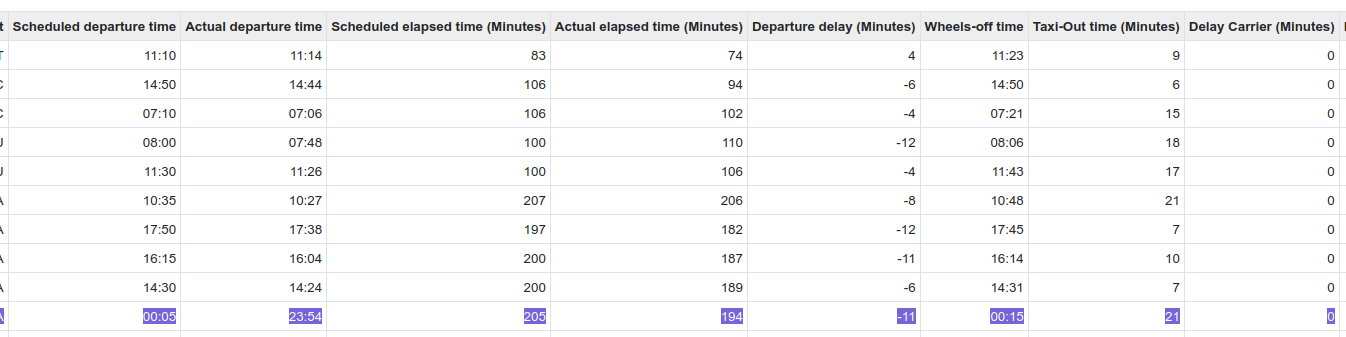

In [8]:
# Let's read only the first row of the raw file (without converting data types)
pd.set_option('display.max_columns', None) # display all columns in output
display(pd.read_csv('/content/flights.csv', dtype=str, nrows=1))

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,21,0015,205,194,169,1448,0404,4,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Load all data of flights
rawdt_flights = pd.read_csv('/content/flights.csv',
                            dtype={'SCHEDULED_DEPARTURE':str,
                                   'DEPARTURE_TIME':str,
                                   'WHEELS_OFF':str,
                                   'WHEELS_ON':str,
                                   'SCHEDULED_ARRIVAL':str,
                                   'ARRIVAL_TIME':str})

In [10]:
print('\nVariables and types:\n')
rawdt_flights.info()

print('\nDataset first 5 rows:\n')
display(rawdt_flights.head())

prev_description_flights = rawdt_flights.describe()
print('\nPrevious description for numeric columns:\n')
display(round(prev_description_flights.T,2))

print('\nCount of missing in each column:\n')
display(rawdt_flights.isna().sum())

# Importing to SQL connection
rawdt_flights.to_sql('flights', conn, index=False, if_exists='replace')


Variables and types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  object 
 10  DEPARTURE_TIME       object 
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           object 
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            object 
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    object 
 21  ARRIVAL_TIME         object 
 22  ARRIVAL_DELAY        float64
 23  DIVERTED 

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11.0,21.0,0015,205.0,194.0,169.0,1448,0404,4.0,0430,0408,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8.0,12.0,0014,280.0,279.0,263.0,2330,0737,4.0,0750,0741,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,0018,-2.0,16.0,0034,286.0,293.0,266.0,2296,0800,11.0,0806,0811,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5.0,15.0,0030,285.0,281.0,258.0,2342,0748,8.0,0805,0756,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,0024,-1.0,11.0,0035,235.0,215.0,199.0,1448,0254,5.0,0320,0259,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



Previous description for numeric columns:



,count,mean,std,min,25%,50%,75%,max
YEAR,5819079.0,2015.00,0.00,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5819079.0,6.52,3.41,1.0,4.0,7.0,9.0,12.0
DAY,5819079.0,15.70,8.78,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5819079.0,3.93,1.99,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5819079.0,2173.09,1757.06,1.0,730.0,1690.0,3230.0,9855.0
DEPARTURE_DELAY,5732926.0,9.37,37.08,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5730032.0,16.07,8.90,1.0,11.0,14.0,19.0,225.0
SCHEDULED_TIME,5819073.0,141.69,75.21,18.0,85.0,123.0,173.0,718.0
ELAPSED_TIME,5714008.0,137.01,74.21,14.0,82.0,118.0,168.0,766.0
AIR_TIME,5714008.0,113.51,72.23,7.0,60.0,94.0,144.0,690.0



Count of missing in each column:



YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

5819079

---
## **✈ Top 5 airports with the highest number of delays**

> **Task**: _Identify the top 5 airports with the highest number of delays. Consider departure delays ('DEPARTURE_DELAY')._


In [11]:
# Function to print the results of a query into pandas dataframe (better to see in the notebook)
def query_result(query):
  result = conn.execute(query)
  return display(pd.DataFrame(result.fetchall(),
                              columns=[description[0] for description in result.description]))

In [12]:
# Function to get a query result as pandas dataframe
def get_query_result(query, verbose=True, dtype=None):
  result = conn.execute(query)
  df_result = pd.DataFrame(result.fetchall(),
                           columns=[description[0] for description in result.description],
                           dtype=dtype)
  if verbose: # print if requested
    print(query)
    display(df_result)
  return df_result

In [13]:
# First try getting the top 5 airports with highest number of delays,
# considering delay with DEPARTURE_DELAY > 0
query_result('''
  SELECT
    ORIGIN_AIRPORT, COUNT() COUNT
  FROM
    flights
  WHERE
    DEPARTURE_DELAY > 0
  GROUP BY
    ORIGIN_AIRPORT
''')

,ORIGIN_AIRPORT,COUNT
0,10135,69
1,10136,39
2,10140,687
3,10141,16
4,10146,20
...,...,...
621,WRG,194
622,WYS,41
623,XNA,2783
624,YAK,128


Notice that there is more codes in `ORIGIN_CODE` than in the table of `IATA_CODE`. With a long search, it was observed that these another codes is in US DOT format and in [this link](https://www.transtats.bts.gov/FieldInfo.asp?Svryq_Qr5p=b4vtv0%FDNv42146%FP%FDNv42146%FDVQ.%FDN0%FDvqr06vsvpn6v10%FD07zor4%FDn55vt0rq%FDoB%FDhf%FDQbg%FD61%FDvqr06vsB%FDn%FD70v37r%FDnv42146.%FD%FDh5r%FD6uv5%FDsvryq%FDs14%FDnv42146%FDn0nyB5v5%FDnp4155%FDn%FD4n0tr%FD1s%FDBrn45%FDorpn75r%FDn0%FDnv42146%FDpn0%FDpun0tr%FDv65%FDnv42146%FDp1qr%FDn0q%FDnv42146%FDp1qr5%FDpn0%FDor%FD4r75rq.&Svryq_gB2r=a7z&Y11x72_gnoyr=Y_NVecbeg_VQ&gnoyr_VQ=FGJ&flf_gnoyr_anzr=g_bagVZR_eRcbegVaT&fB5_Svryq_anzr=beVTVa_NVecbeg_VQ) is possible to access description for each one.

In [14]:
! wget --no-check-certificate 'https://www.transtats.bts.gov/Download_Lookup.asp?Y11x72=Y_NVecbeg_VQ' -O usdotcode.csv

--2024-01-30 04:11:33--  https://www.transtats.bts.gov/Download_Lookup.asp?Y11x72=Y_NVecbeg_VQ
Resolving www.transtats.bts.gov (www.transtats.bts.gov)... 204.68.194.70
Connecting to www.transtats.bts.gov (www.transtats.bts.gov)|204.68.194.70|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 321093 (314K) [Application/X-Unknown]
Saving to: ‘usdotcode.csv’

usdotcode.csv       100%[===================>] 313.57K   624KB/s    in 0.5s    

2024-01-30 04:11:34 (624 KB/s) - ‘usdotcode.csv’ saved [321093/321093]



In [15]:
dt_usdotcode = pd.read_csv('/content/usdotcode.csv', dtype=str)
dt_usdotcode.columns = ['USDOT_CODE','DESCRIPTION']
display(dt_usdotcode.loc[0:10,]) # show first 10 rows of the US DOT table with description

,USDOT_CODE,DESCRIPTION
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"
5,10007,"Klawock, AK: Klawock Seaplane Base"
6,10008,"Elizabeth Island, AK: Elizabeth Island Airport"
7,10009,"Homer, AK: Augustin Island"
8,10010,"Hudson, NY: Columbia County"
9,10011,"Peach Springs, AZ: Grand Canyon West"


In the site of the data, https://www.bts.gov/topics/airlines-and-airports/world-airport-codes, there is a code and a description which matches with the US DOT code description.

In [16]:
refer_IATA_CODE = pd.read_html("https://www.bts.gov/topics/airlines-and-airports/world-airport-codes")[0]
refer_IATA_CODE.columns = ['IATA_CODE','DESCRIPTION']
print(refer_IATA_CODE.shape) # rows before drop duplicates
refer_IATA_CODE.drop_duplicates(subset='DESCRIPTION', keep='last', inplace=True) # removing duplicated descriptions (for consistency)
print(refer_IATA_CODE.shape) # rows after drop duplicates
# Actually only BSM Austin, TX: Austin - Bergstrom International need to be switch to AUS for this period (posterior analyses was made)
refer_IATA_CODE.loc[refer_IATA_CODE['IATA_CODE'] == 'BSM','IATA_CODE'] = 'AUS'

(6510, 2)
(6464, 2)


In [17]:
cursor.execute('''
  CREATE TABLE IF NOT EXISTS airports_USDOTCODE (
    CODE TEXT PRIMARY KEY,
    DESCRIPTION TEXT
  );
''')

cursor.execute('''
  CREATE TABLE IF NOT EXISTS airports_IATACODE (
    CODE TEXT PRIMARY KEY,
    DESCRIPTION TEXT
  );
''')

refer_IATA_CODE.to_sql('airports_IATACODE', conn, index=False, if_exists='replace')
dt_usdotcode.to_sql('airports_USDOTCODE', conn, index=False, if_exists='replace')

6666

In [18]:
cursor.execute('DROP VIEW IF EXISTS IATA_USDOT')
cursor.execute('''
  CREATE TEMPORARY VIEW IF NOT EXISTS IATA_USDOT AS
    SELECT IATA_CODE, USDOT_CODE, a.DESCRIPTION DESCRIPTION
    FROM airports_USDOTCODE a
    INNER JOIN airports_IATACODE b ON a.DESCRIPTION = b.DESCRIPTION;
''')

query_result('''
  SELECT * FROM IATA_USDOT
''')

,IATA_CODE,USDOT_CODE,DESCRIPTION
0,01A,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,10004,"Lik, AK: Lik Mining Camp"
3,05A,10005,"Little Squaw, AK: Little Squaw Airport"
4,06A,10006,"Kizhuyak, AK: Kizhuyak Bay"
...,...,...,...
6123,PSQ,16828,"Essington, PA: Philadelphia Seaplane Base"
6124,LNA,16829,"West Palm Beach, FL: Palm Beach County Park"
6125,2NY,16830,"Port Washington, NY: Sands Point Seaplane Base"
6126,IST,16858,"Istanbul, Turkey: Ataturk"


In [19]:
# Airports with non-matched IATA Code
cursor.execute('''
  CREATE TEMPORARY VIEW IF NOT EXISTS UNMATCHED_USDOTCODE AS
    SELECT USDOT_CODE, DESCRIPTION FROM
    (
      SELECT ORIGIN_AIRPORT
      FROM
      (SELECT DISTINCT(ORIGIN_AIRPORT) FROM flights WHERE LENGTH(ORIGIN_AIRPORT) > 3) a
      LEFT JOIN IATA_USDOT b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
      WHERE IATA_CODE IS NULL
    ) c
    INNER JOIN airports_USDOTCODE d ON c.ORIGIN_AIRPORT = d.USDOT_CODE
''')

query_result('''
  SELECT * FROM UNMATCHED_USDOTCODE
''')

# Making sure that the destination airports list don't have any other new airport unmatched
query_result('''
  SELECT * FROM
  (
    SELECT USDOT_CODE FROM
    (
      SELECT DESTINATION_AIRPORT
      FROM
      (SELECT DISTINCT(DESTINATION_AIRPORT) FROM flights WHERE LENGTH(DESTINATION_AIRPORT) > 3) a
      LEFT JOIN IATA_USDOT b ON a.DESTINATION_AIRPORT = b.USDOT_CODE
      WHERE IATA_CODE IS NULL
    ) c INNER JOIN airports_USDOTCODE d ON c.DESTINATION_AIRPORT = d.USDOT_CODE
  ) e LEFT JOIN UNMATCHED_USDOTCODE f ON e.USDOT_CODE = f.USDOT_CODE
  WHERE e.USDOT_CODE IS NULL
''')

,USDOT_CODE,DESCRIPTION
0,12889,"Las Vegas, NV: Harry Reid International"
1,15919,"Fayetteville, AR: Northwest Arkansas National"
2,14487,"Redding, CA: Redding Regional"
3,13256,"Mission/McAllen/Edinburg, TX: McAllen Internat..."
4,13796,"Oakland, CA: Metro Oakland International"
5,13296,"Manchester, NH: Manchester Boston Regional"
6,14307,"Providence, RI: Rhode Island Tf Green Internat..."
7,14576,"Rochester, NY: Frederick Douglass Grtr Rochest..."
8,13486,"Missoula, MT: Missoula Montana"
9,13367,"Moline, IL: Quad Cities International"


,USDOT_CODE,USDOT_CODE,DESCRIPTION


It can be possible to analyse each case of unmatched US DOT code with IATA code set. For example, *Harry Reid International* called *McCarran International* before, so the IATA code is LAS by making a search (Source: https://edition.cnn.com/travel/article/las-vegas-airport-name-change-vote-harry-reid/index.html).

In [20]:
# Manually input of IATA_CODE for those that unmatched US DOT before
# 'LAS','XNA','RDD','MFE','OAK','MHT','PVD','ROC','MSO','MLI','CRW','SDF','BMI','GCC','RKS','SUX','TOL','MLB','ROW','ROA','SWF','MQT'

res_unmatched_usdotcode = conn.execute('''
  SELECT * FROM UNMATCHED_USDOTCODE
''')
tab_unmatched_usdotcode = pd.DataFrame(res_unmatched_usdotcode.fetchall(),
                                       columns=[description[0] for description in res_unmatched_usdotcode.description])

res_iata_usdot = conn.execute('''
  SELECT * FROM IATA_USDOT
''')
tab_iata_usdot = pd.DataFrame(res_iata_usdot.fetchall(),
                              columns=[description[0] for description in res_iata_usdot.description])

tab_unmatched_usdotcode['IATA_CODE'] = ['LAS','XNA','RDD','MFE','OAK','MHT','PVD','ROC','MSO','MLI','CRW','SDF','BMI','GCC','RKS','SUX','TOL','MLB','ROW','ROA','SWF','MQT']
new_tab_iata_usdot = pd.concat([tab_unmatched_usdotcode[['IATA_CODE','USDOT_CODE','DESCRIPTION']],
                                tab_iata_usdot])

In [21]:
# Creating a table with IATA and USDOT codes matched
cursor.execute('''
  CREATE TABLE IF NOT EXISTS IATA_USDOT_CODE (
    IATA_CODE TEXT PRIMARY KEY,
    USDOT_CODE TEXT,
    DESCRIPTION TEXT
  );
''')

new_tab_iata_usdot.to_sql('IATA_USDOT_CODE', conn, index=False, if_exists='replace')

6150

In [22]:
# Query to look at airports without details in aiports table.
query_result('''
  SELECT * FROM
    (
      SELECT DISTINCT(ORIGIN_IATA_AIRPORT) FROM
      (
        SELECT
          CASE
            WHEN IATA_CODE IS NULL THEN ORIGIN_AIRPORT
            ELSE IATA_CODE
          END ORIGIN_IATA_AIRPORT
        FROM
        flights a LEFT JOIN IATA_USDOT_CODE b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
      )
    ) a LEFT JOIN airports b ON a.ORIGIN_IATA_AIRPORT = b.IATA_CODE
  WHERE IATA_CODE IS NULL
''')

,ORIGIN_IATA_AIRPORT,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE


In [23]:
# Finally, getting the top 5 airports with highest number of delays,
# considering delay with DEPARTURE_DELAY > 0
print('Top 5 airports with highest number of delays, considering delay with DEPARTURE_DELAY > 0')
query_result('''
SELECT RANK() OVER(ORDER BY COUNT DESC) || 'º' RANK, AIRPORT, ORIGIN_AIRPORT_IATA IATA, COUNT COUNT_DELAYS
FROM
(
SELECT ORIGIN_AIRPORT_IATA, COUNT() COUNT
FROM
(
  SELECT
    DEPARTURE_DELAY,
    CASE
      WHEN IATA_CODE IS NULL THEN ORIGIN_AIRPORT
      ELSE IATA_CODE
    END ORIGIN_AIRPORT_IATA
  FROM
  flights a LEFT JOIN IATA_USDOT_CODE b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
)
WHERE DEPARTURE_DELAY > 0
GROUP BY ORIGIN_AIRPORT_IATA
ORDER BY COUNT DESC
LIMIT 5
) a
INNER JOIN
airports b ON a.ORIGIN_AIRPORT_IATA = b.IATA_CODE
''')

Top 5 airports with highest number of delays, considering delay with DEPARTURE_DELAY > 0


,RANK,AIRPORT,IATA,COUNT_DELAYS
0,1º,Hartsfield-Jackson Atlanta International Airport,ATL,139519
1,2º,Chicago O'Hare International Airport,ORD,130240
2,3º,Dallas/Fort Worth International Airport,DFW,102583
3,4º,Denver International Airport,DEN,95870
4,5º,Los Angeles International Airport,LAX,87717


But if, according to https://en.wikipedia.org/wiki/Flight_cancellation_and_delay, we consider _"a flight to be delayed when it is 15 minutes later than its scheduled time"_ then the result is:

In [24]:
query_top5delays = '''
SELECT RANK() OVER(ORDER BY COUNT DESC) || 'º' RANK, AIRPORT, ORIGIN_AIRPORT_IATA IATA, COUNT COUNT_DELAYS
FROM
(
SELECT ORIGIN_AIRPORT_IATA, COUNT() COUNT
FROM
(
  SELECT
    *,
    CASE
      WHEN IATA_CODE IS NULL THEN ORIGIN_AIRPORT
      ELSE IATA_CODE
    END ORIGIN_AIRPORT_IATA
  FROM
  flights a LEFT JOIN IATA_USDOT_CODE b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
)
WHERE DEPARTURE_DELAY > 15
GROUP BY ORIGIN_AIRPORT_IATA
ORDER BY COUNT DESC
LIMIT 5
) a
INNER JOIN
airports b ON a.ORIGIN_AIRPORT_IATA = b.IATA_CODE
'''

print('Top 5 airports with highest number of delays, considering delay with DEPARTURE_DELAY > 15')
top_airports_delay = get_query_result(query_top5delays, verbose=False)
display(top_airports_delay)

Top 5 airports with highest number of delays, considering delay with DEPARTURE_DELAY > 15


,RANK,AIRPORT,IATA,COUNT_DELAYS
0,1º,Chicago O'Hare International Airport,ORD,69138
1,2º,Hartsfield-Jackson Atlanta International Airport,ATL,62696
2,3º,Dallas/Fort Worth International Airport,DFW,52629
3,4º,Denver International Airport,DEN,45256
4,5º,Los Angeles International Airport,LAX,41480


In [25]:
# Code cell just to cleaned dataframes loaded in cache to free RAM memory
try:
  del rawdt_airlines
  print('Successfully deleted!')
except:
  print('Already deleted!')
try:
  del rawdt_airports, rawdt_airports1
  print('Successfully deleted!')
except:
  print('Already deleted!')
try:
  del rawdt_flights
  print('Successfully deleted!')
except:
  print('Already deleted!')

Successfully deleted!
Successfully deleted!
Successfully deleted!


# 2. Data Visualization and Data Analysis

## Instructions for the Data Visualization Module
### Distribution of Delays by Airline:
- Create a chart showing the distribution of delays (both positive and negative) for each airline.
- The chart should allow for easy comparison between the companies.

### Relationship Between Flight Distance and Delays:
- Create a scatter plot that relates flight distance to departure delay.
- Identify any visible trends or patterns.

### Delays by Airline:
- Visualize how delays vary throughout the day.
- Consider showing the average delays by hour of departure.

### Map of Delays by Airport:
- Create a map visualization showing the location of airports with the quantity or percentage of delays.
- This may involve integrating geographical data of airports with flight delays.

### Temporal Analysis of Delays:
- Analyze how flight delays varied throughout the year 2015.
- Create a line or bar chart showing the monthly variation of delays.

### Additional Considerations:
- You could use libs like Matplotlib, Seaborn, Plotly, or any other visualization tool that you are comfortable with.
- Include legends, titles, axis labels, and any other annotations to make the visualizations easily interpretable.
- Provide a brief description or interpretation of the insights gained from each graph.

In [26]:
# Importing packages of visualizations
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import plotly.graph_objects as go

---
## **📊 Distribution of Delays by Airline**

> **Task**: _Create a chart showing the distribution of delays (both positive and negative) for each airline. The chart should allow for easy comparison between the companies._

In [27]:
tab_delays_airline = get_query_result('''
  SELECT
    DEPARTURE_DELAY, ARRIVAL_DELAY, '(' || a.AIRLINE || ') ' || b.AIRLINE  AIRLINE
  FROM
    flights a LEFT JOIN airlines b ON a.AIRLINE = b.IATA_CODE
''')

tab_delays_airline = tab_delays_airline.astype({'DEPARTURE_DELAY':'float16','ARRIVAL_DELAY':'float16'})
tab_delays_airline.info()



  SELECT
    DEPARTURE_DELAY, ARRIVAL_DELAY, '(' || a.AIRLINE || ') ' || b.AIRLINE  AIRLINE
  FROM
    flights a LEFT JOIN airlines b ON a.AIRLINE = b.IATA_CODE



,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE
0,-11.0,-22.0,(AS) Alaska Airlines Inc.
1,-8.0,-9.0,(AA) American Airlines Inc.
2,-2.0,5.0,(US) US Airways Inc.
3,-5.0,-9.0,(AA) American Airlines Inc.
4,-1.0,-21.0,(AS) Alaska Airlines Inc.
...,...,...,...
5819074,-4.0,-26.0,(B6) JetBlue Airways
5819075,-4.0,-16.0,(B6) JetBlue Airways
5819076,-9.0,-8.0,(B6) JetBlue Airways
5819077,-6.0,-10.0,(B6) JetBlue Airways


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   DEPARTURE_DELAY  float16
 1   ARRIVAL_DELAY    float16
 2   AIRLINE          object 
dtypes: float16(2), object(1)
memory usage: 66.6+ MB


In [28]:
# Interative plot to see delays per airline
app = Dash(__name__)

app.layout = html.Div([
  html.P("Select delay type:"),
  dcc.RadioItems(
    id='is_arrival',
    options=['Departure delay', 'Arrival delay'],
    value='Departure delay', inline=True
  ),
  dcc.RadioItems(
    id='delay',
    options=['Positive', 'Negative', 'Both'],
    value='Both', inline=True
  ),
  dcc.Graph(id="graph"),
],style={'font-family':'sans-serif','background-color':'white','padding':'10px'})

@app.callback(
  Output("graph", "figure"),
  Input("delay", "value"),
  Input("is_arrival", "value"))
def display_graph(delay, is_arrival):
  if is_arrival=='Departure delay':
    if delay=='Both': tab = tab_delays_airline
    elif delay=='Positive': tab = tab_delays_airline.query('DEPARTURE_DELAY > 0')
    else: tab = tab_delays_airline.query('DEPARTURE_DELAY < 0')
    fig = px.histogram(tab, x="DEPARTURE_DELAY", color="AIRLINE",opacity=0.75,
                       barmode='overlay',histnorm='percent',
                       color_discrete_sequence=px.colors.qualitative.Dark24[:14])
  else:
    if delay=='Both': tab = tab_delays_airline
    elif delay=='Positive': tab = tab_delays_airline.query('ARRIVAL_DELAY > 0')
    else: tab = tab_delays_airline.query('ARRIVAL_DELAY < 0')
    fig = px.histogram(tab, x="ARRIVAL_DELAY", color="AIRLINE",opacity=0.75,
                       barmode='overlay',histnorm='percent',
                       color_discrete_sequence=px.colors.qualitative.Dark24[:14])
  return fig

app.run_server(debug=True, port='1', use_reloader=False)

<IPython.core.display.Javascript object>

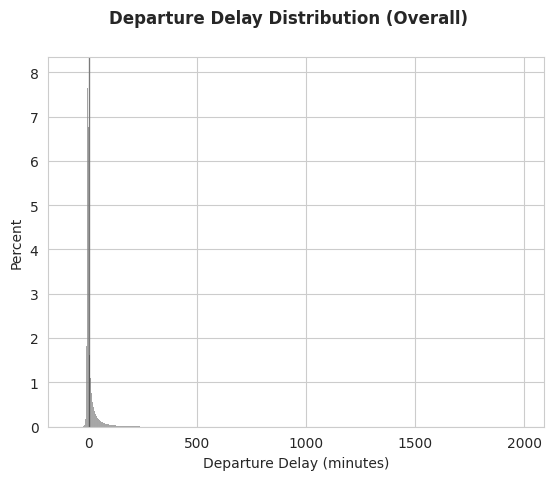

In [29]:
# Departure delay distribution in percent
sns.set_style("whitegrid")
p = sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAY']),
                  x="DEPARTURE_DELAY",
                  stat='percent', binwidth=1, color='grey')
p.axvline(x=0, color='black', alpha=0.4, linewidth=1)
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Percent")
plt.suptitle('Departure Delay Distribution (Overall)', fontweight='bold')
plt.show()

In [30]:
# Notice that 99.5% of the values in DEPARTURE_DELAY are between the next range presented:
DEPARTURE_DELAY_995p = tab_delays_airline.DEPARTURE_DELAY.quantile(q=[0.0025,0.9975]).to_list()
print(DEPARTURE_DELAY_995p)

print('Number of truncated informations: ',int(len(tab_delays_airline)*0.005))

# So let's truncate the values and set all under and above the range
tab_delays_airline['DEPARTURE_DELAYtrunc'] = tab_delays_airline.DEPARTURE_DELAY.copy()

tab_delays_airline.DEPARTURE_DELAYtrunc[tab_delays_airline.DEPARTURE_DELAYtrunc>DEPARTURE_DELAY_995p[1]] =\
  DEPARTURE_DELAY_995p[1]+1

tab_delays_airline.DEPARTURE_DELAYtrunc[tab_delays_airline.DEPARTURE_DELAYtrunc<DEPARTURE_DELAY_995p[0]] =\
  DEPARTURE_DELAY_995p[0]-1

[-16.0, 278.0]
Number of truncated informations:  29095


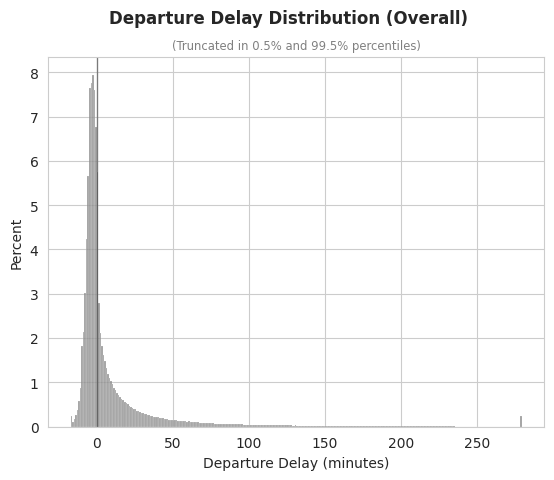

In [31]:
# Departure delay distribution in percent (truncated in 0.005 and 0.995 percentiles)
p = sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc']),
                  x="DEPARTURE_DELAYtrunc",
                  stat='percent', binwidth=1, color='grey')
p.axvline(x=0, color='black', alpha=0.4, linewidth=1)
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Percent")
plt.suptitle('Departure Delay Distribution (Overall)', fontweight='bold')
plt.title('(Truncated in 0.5% and 99.5% percentiles)', color='grey', fontsize='small')
plt.show()

In [32]:
airlines_name = tab_delays_airline.AIRLINE.unique().tolist()
airlines_color = sns.color_palette('husl',len(airlines_name))

In [33]:
def draw_cdf_2airlines(airline, other_airline, axe, i, j, show_legend=False):
  '''
  Auxiliar function to plot_compare_airlines_dist which draws cumulative distribution
  for positive or negative values.
  '''
  sns.histplot(
    data=tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc'])\
                  .query(f'AIRLINE == "{other_airline}"'), x="DEPARTURE_DELAYtrunc",
    element="step", fill=True,
    cumulative=True, stat="percent", color=airlines_color[j], linewidth=0.8, ax=axe,
    label=other_airline, legend=show_legend
  )

  sns.histplot(
    data=tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc'])\
                  .query(f'AIRLINE == "{airline}"'), x="DEPARTURE_DELAYtrunc",
    element="step", fill=True,
    cumulative=True, stat="percent", color=airlines_color[i], alpha=0.5, ax=axe,
    label=airline, legend=show_legend
  )
  axe.axvline(x=0, color='black', alpha=0.4, linewidth=1)
  axe.set_xlabel("Departure Delay (minutes)", fontsize='small')
  axe.set_ylabel("Percent", fontsize='small')


def plot_dist_airline(airline):
  '''
  Function to plot the distribution of departure delay for each airline,
  and show the cumulative distribution comparing to the all set (overall).
  '''
  i = airlines_name.index(airline)
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9,4))

  sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc'])\
                    .query(f'AIRLINE == "{airline}"'),
                    x="DEPARTURE_DELAYtrunc",
                    stat='percent', binwidth=1, color=airlines_color[i], ax=ax1)
  ax1.axvline(x=0, color='black', alpha=0.4, linewidth=1)
  ax1.set_xlabel("Departure Delay (minutes)")
  ax1.set_ylabel("Percent")
  ax1.set_title('Departure Delay Distribution', color='grey',  fontsize='small')

  sns.histplot(
      data=tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc']), x="DEPARTURE_DELAYtrunc",
      element="step", fill=True,
      cumulative=True, stat="percent", color='black', linewidth=0.8, ax=ax2
  )

  sns.histplot(
      data=tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc'])\
                    .query(f'AIRLINE == "{airline}"'), x="DEPARTURE_DELAYtrunc",
      element="step", fill=True,
      cumulative=True, stat="percent", color=airlines_color[i], alpha=0.5, ax=ax2
  )

  ax2.axvline(x=0, color='black', alpha=0.4, linewidth=1, label='Overall')
  ax2.set_xlabel("Departure Delay (minutes)")
  ax2.set_ylabel("Percent")
  ax2.set_title('Departure Delay Cumulative Distribution', color='grey',  fontsize='small')
  ax2.legend(loc='lower right')

  plt.suptitle(f'{airline}', color=airlines_color[i], fontweight='bold')

  plt.show()

def plot_compare_airlines_dist(airline,other_airline):
  '''
  Function to plot two airlines cumulative distribution to compare them.
  '''
  i = airlines_name.index(airline)
  j = airlines_name.index(other_airline)
  fig, axarr = plt.subplots(1,2, figsize=(9,4), sharey=True)

  axe_neg = axarr[0]
  axe_pos = axarr[1]

  draw_cdf_2airlines(airline, other_airline, axe_neg, i, j)
  draw_cdf_2airlines(airline, other_airline, axe_pos, i, j, show_legend='full')

  axe_neg.set_title(f'Cumulative Distribution {airline} VS. {other_airline}', color='black',  fontsize='large', fontweight='bold', loc='left')
  axe_neg.set_xlim(right=0)
  axe_pos.set_xlim(left=0)
  axe_pos.legend()
  axe_pos.legend(loc='lower right')

  fig.tight_layout()
  fig.show()
  print("\n\n")

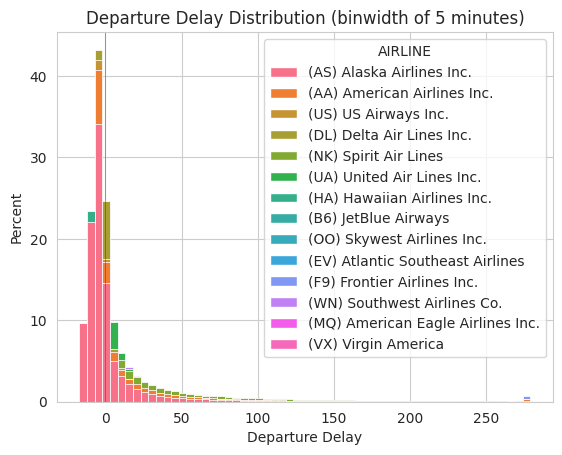

In [34]:
sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc']), x="DEPARTURE_DELAYtrunc", hue="AIRLINE", stat="percent",
             binwidth=5, common_norm=False, alpha=1).set(title='Departure Delay Distribution (binwidth of 5 minutes)', xlabel='Departure Delay', ylabel='Percent')
plt.axvline(x=0, color='black', alpha=0.4, linewidth=0.5)
plt.show()

The Frontier Airlines Inc. (F9) presents considerable number of flights delayed, by observing the percent of positive truncated value (in the bottom right of the chart).   

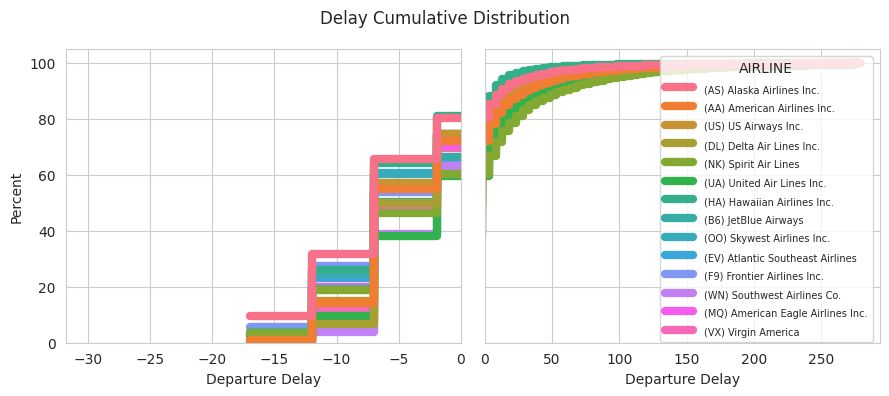

In [35]:
# An ugly plot only to identify the 'extremes' lines which are above or under all others
fig, (axe_neg, axe_pos) = plt.subplots(1,2, figsize=(9,4), sharey=True)

p1 = sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc']),
             x="DEPARTURE_DELAYtrunc",
             hue="AIRLINE",
             stat="percent",
             common_norm=False,
             element="step",
             fill=False,
             cumulative=True,
             alpha=1,
             ax=axe_neg,
             linewidth=6,
             legend=False,
             binwidth=5
             ).set(xlabel='Departure Delay', ylabel='Percent')

p2 = sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc']),
             x="DEPARTURE_DELAYtrunc",
             hue="AIRLINE",
             stat="percent",
             common_norm=False,
             element="step",
             fill=False,
             cumulative=True,
             alpha=1,
             ax=axe_pos,
             linewidth=6,
             binwidth=5
             )

plt.setp(p2.get_legend().get_texts(), fontsize='7')
p2.set(xlabel='Departure Delay', ylabel='Percent')

plt.suptitle(f'Delay Cumulative Distribution')
axe_neg.set_xlim(right=0)
axe_pos.set_xlim(left=0)

plt.rcParams["font.size"] = "10"
fig.tight_layout()
fig.show()

The chart above works only to show the lines that are in the "extremes", e.g. the airline Spirit Air Lines (NK) is almost under all others considering departure delay axis positive. It's a signal of this airline that have more flights delayed (with more delay minutes) comparing to the others.

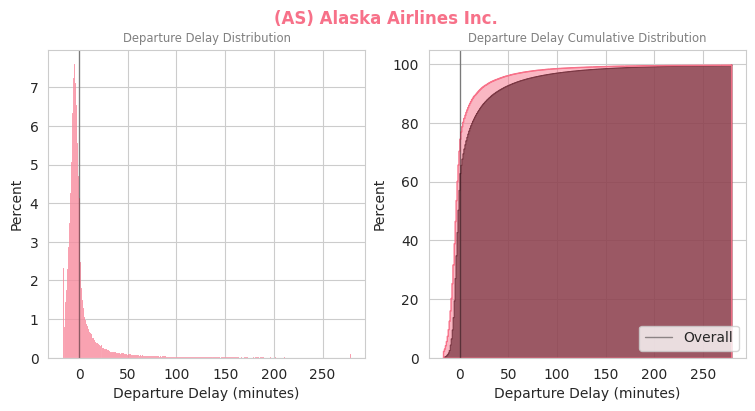

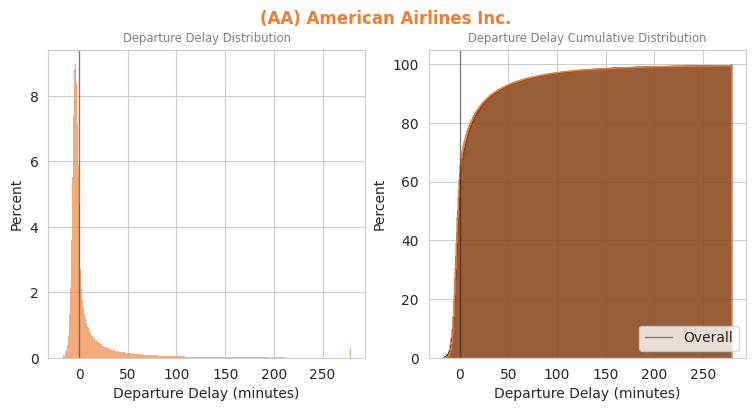

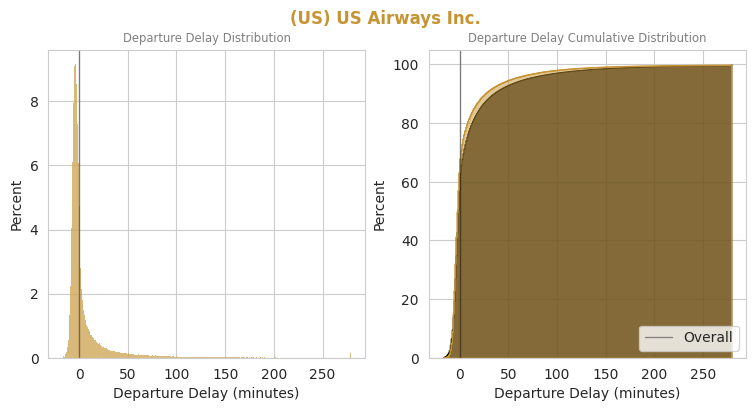

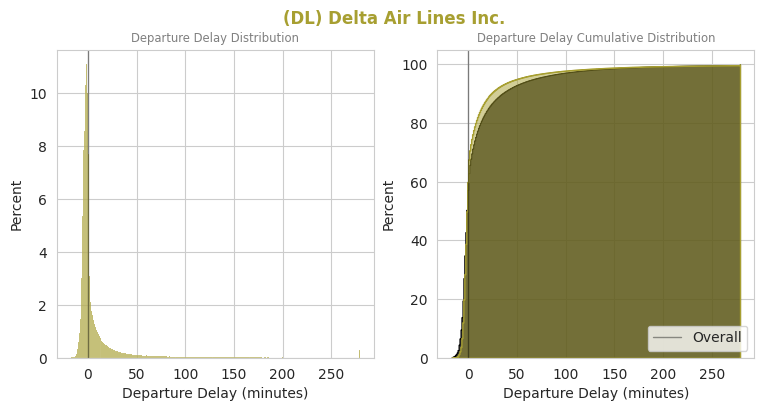

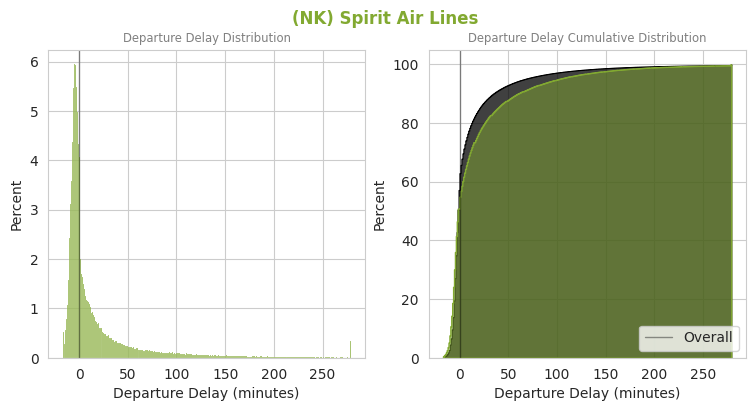

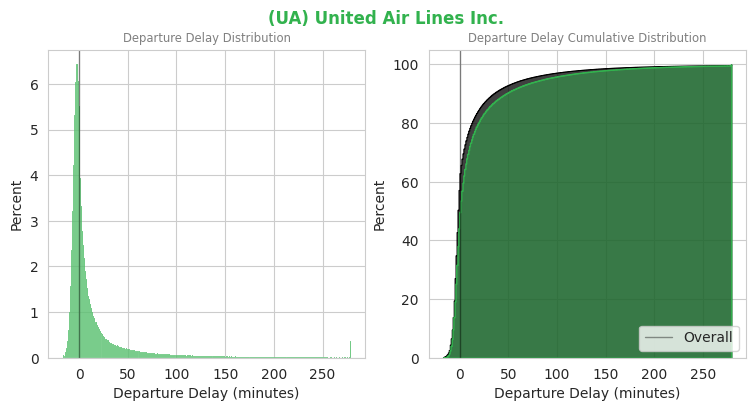

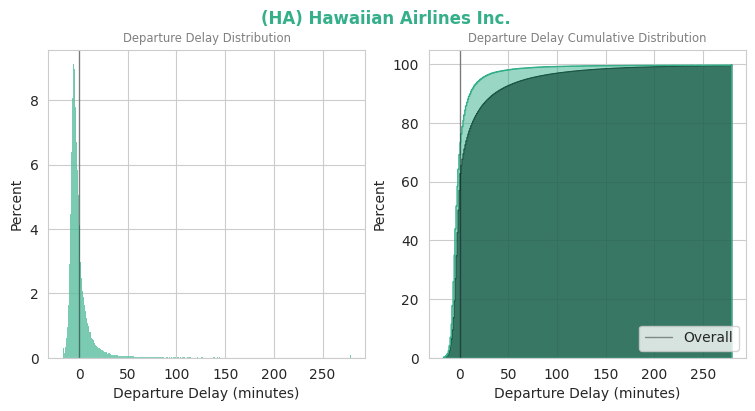

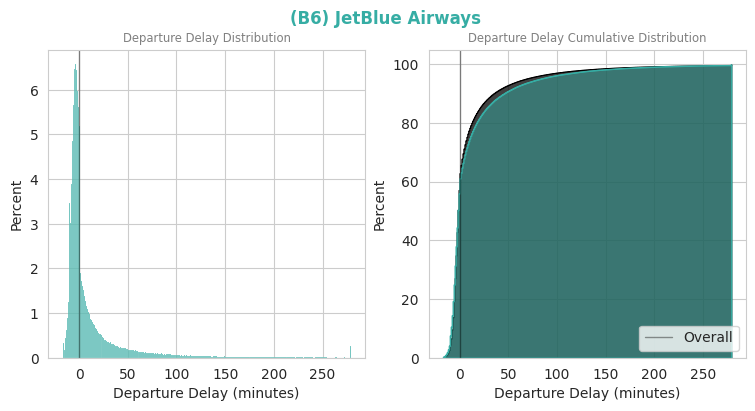

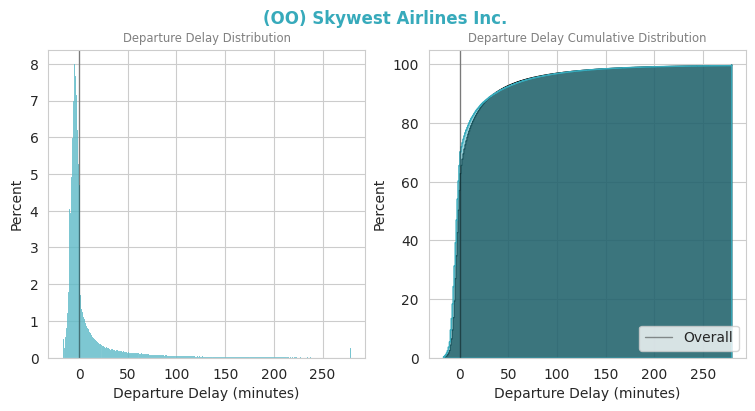

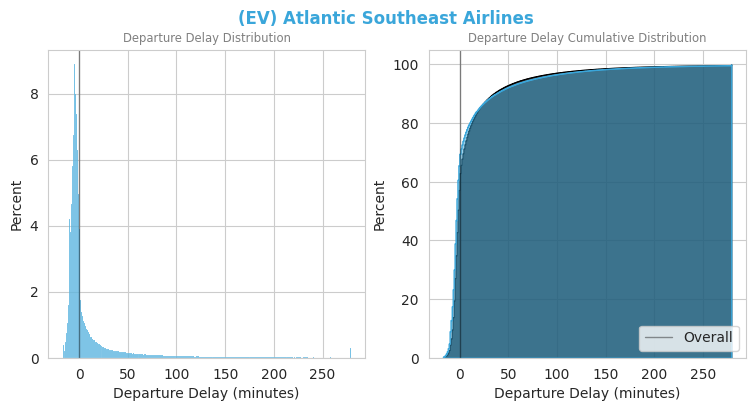

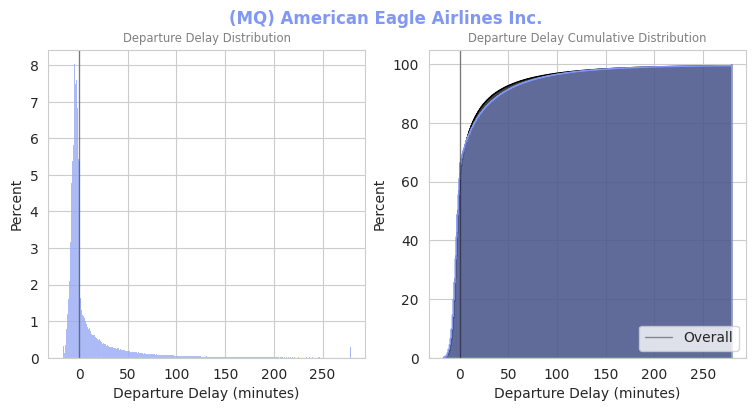

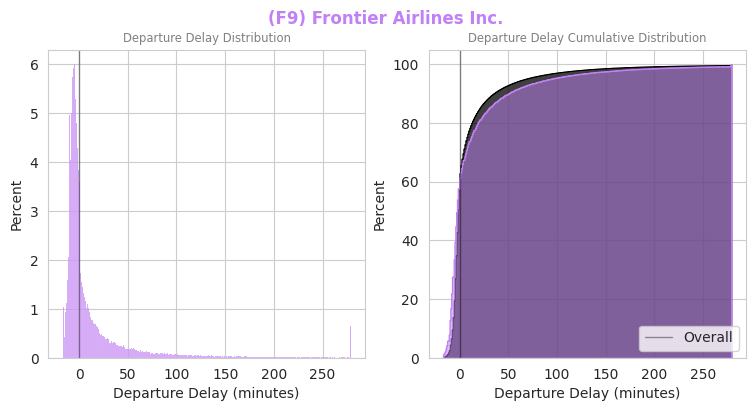

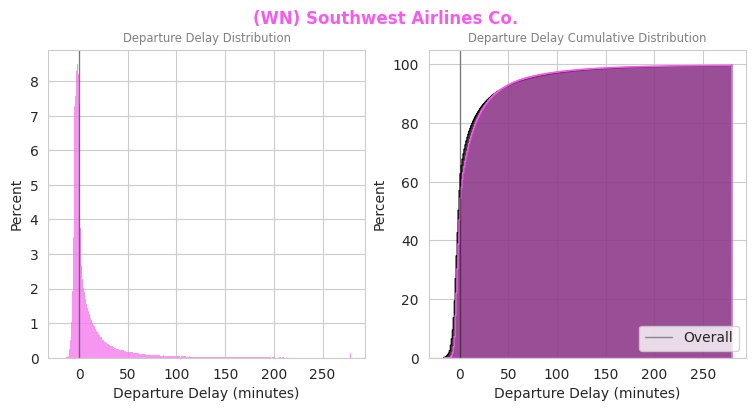

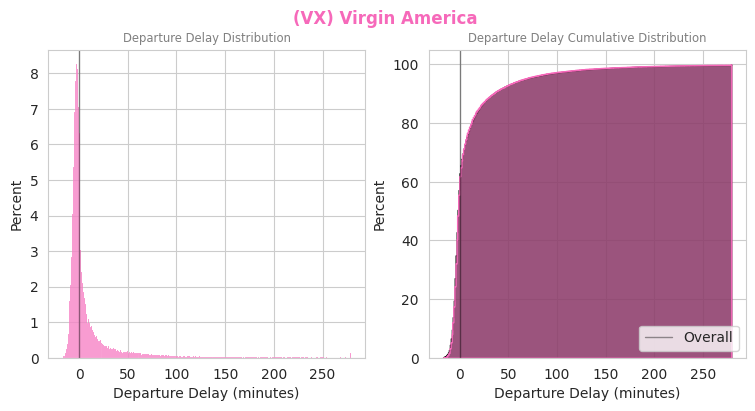

In [36]:
for airline in airlines_name:
  plot_dist_airline(airline)

Looking at the charts, it's possible to see that the curve of cumulative distribution (cdf) of (NK) Spirit Air Lines is under the overall curve so there are more flights with long minutes of departure delay. In the other hand, (HA) Hawaiian Airlines Inc. seems be more "punctual" and has more or less 75% of the flights with no delay positive.

It's interesting observed that (AS) Alaska Airlines Inc. has a lot of flights with relative huge negative delay.

Let's compare above the NK and HA airlines' delay distribution:

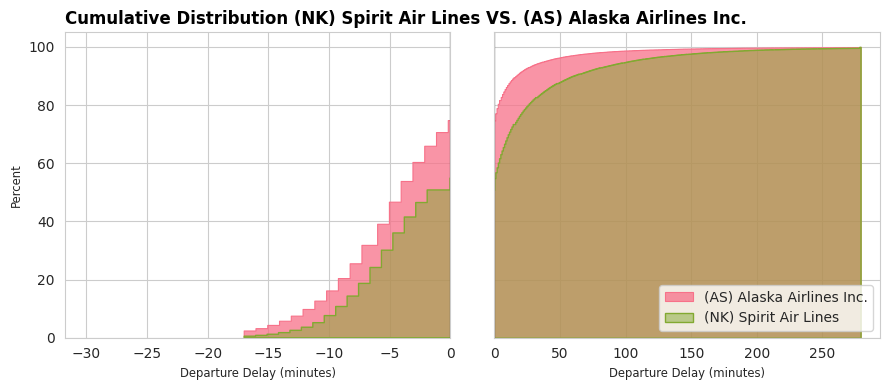

In [37]:
plot_compare_airlines_dist('(NK) Spirit Air Lines','(AS) Alaska Airlines Inc.')

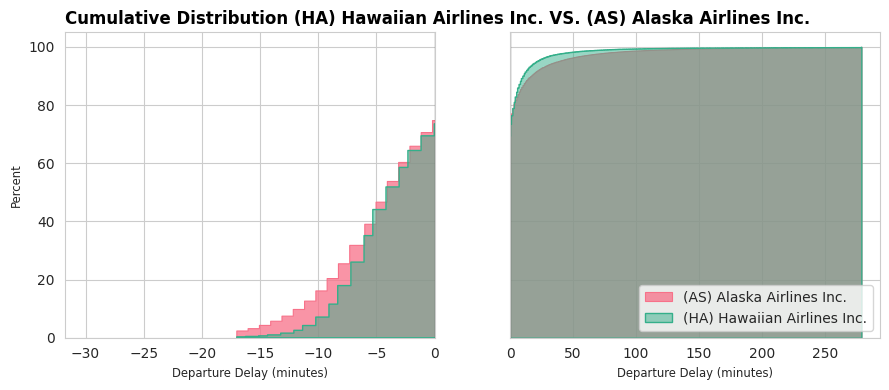

In [38]:
plot_compare_airlines_dist('(HA) Hawaiian Airlines Inc.','(AS) Alaska Airlines Inc.')

In the chart above, it's possible to observe that HA arlines has more flights "punctual" than Alaska Airline which has more flights ahead.

---
## **📊 Relationship Between Flight Distance and Delays**

> **Task**: _Create a scatter plot that relates flight distance to departure delay. Identify any visible trends or patterns._


In [39]:
tab_delays_distance = get_query_result('''
  SELECT
    DISTANCE, DEPARTURE_DELAY
  FROM
    flights
  WHERE
    DISTANCE NOT NULL AND DEPARTURE_DELAY NOT NULL
''',
verbose=False)

tab_delays_distance = tab_delays_distance.astype({'DEPARTURE_DELAY':'float16'})

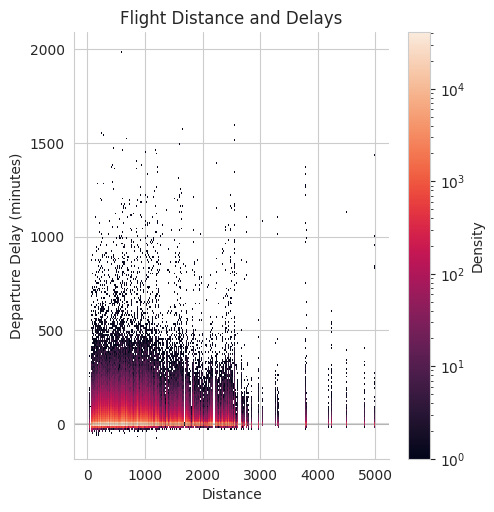

In [40]:
p = sns.displot(tab_delays_distance, x="DISTANCE", y="DEPARTURE_DELAY",
            binwidth=(10, 10), cbar=True, cmap="rocket", norm=LogNorm(), vmin=None, vmax=None, cbar_kws={'label': 'Density'})
p.set_axis_labels("Distance", "Departure Delay (minutes)")
p.set(title="Flight Distance and Delays")
p.ax.axhline(y = 0.2, color = "grey", alpha=0.3)
plt.show()

For the first view, it seems that the greater is distance, the departure delay don't changes the distribution a lot. However, identifying that for small distances (between the values 0 and 1500 in x-axis), there are a significant density for greater departure delay in fact.

---
## **📊 Delays Throughout the Day**

> **Task**: _Visualize how delays vary throughout the day. Consider showing the average delays by hour of departure._


In [41]:
tab_delay_per_hour = get_query_result('''
  SELECT
    DEPARTURE_DELAY, SCHEDULED_DEPARTURE
  FROM
    flights
  WHERE
    DEPARTURE_DELAY NOT NULL
''', verbose=False)

tab_delay_per_hour = tab_delay_per_hour.astype({'DEPARTURE_DELAY':'float16'})

tab_delay_per_hour['HOUR_DAY'] = tab_delay_per_hour.SCHEDULED_DEPARTURE.str.slice(stop=2)
tab_delay_per_hour = tab_delay_per_hour.astype({'HOUR_DAY':'int8'})

# Visualize table with 10 samples of observations to chart
tab_delay_per_hour.sample(10)

,DEPARTURE_DELAY,SCHEDULED_DEPARTURE,HOUR_DAY
1325962,11.0,2005,20
339686,-3.0,1435,14
1687917,8.0,1255,12
3914697,20.0,1930,19
2402236,-6.0,0658,6
5322451,-16.0,1846,18
2454127,1.0,1035,10
4913044,-10.0,1140,11
1737395,-3.0,1234,12
4712655,8.0,1105,11


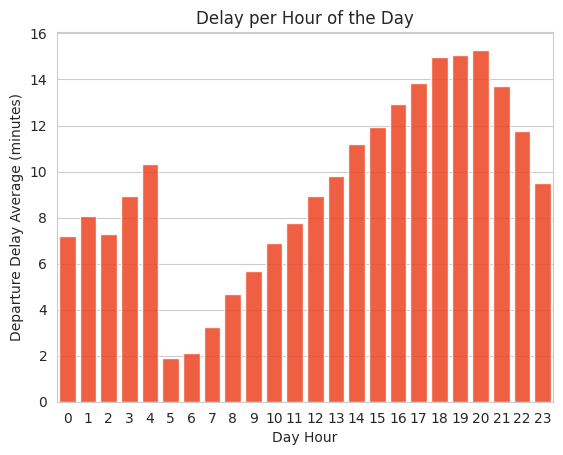

In [42]:
res = tab_delay_per_hour.groupby(by=["HOUR_DAY"]).mean('DEPARTURE_DELAY')
sns.barplot(x=res.index, y=res.DEPARTURE_DELAY, alpha=0.9, color='#EE4D2D', saturation=1)\
  .set(title='Delay per Hour of the Day',  xlabel='Day Hour', ylabel='Departure Delay Average (minutes)')
plt.show()

The biggest departure delay tends to occur in night time with a peak in 8 p.m. Morning flights tends to present small delay.

---
## **📊 Map of Delays by Airport**

> **Task**: _Create a map visualization showing the location of airports with the quantity or percentage of delays. This may involve integrating geographical data of airports with flight delays._


In [43]:
# Let's consider delay for departures greater than 15 minutes
tab_count_delay_airline = get_query_result('''
  SELECT b.IATA_CODE IATA, AIRPORT, CITY, STATE, LATITUDE, LONGITUDE, TOTAL_AIRPORT, DELAY_AIRPORT 	FROM
  (
    SELECT
      COUNT(DEPARTURE_DELAY) AS TOTAL_AIRPORT,
      SUM(
        CASE WHEN DEPARTURE_DELAY > 15 THEN 1 ELSE 0 END
      ) AS DELAY_AIRPORT,
      CASE
        WHEN IATA_CODE IS NULL THEN ORIGIN_AIRPORT
        ELSE IATA_CODE
      END ORIGIN_AIRPORT_IATA
    FROM
    flights a LEFT JOIN IATA_USDOT_CODE b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
    WHERE DEPARTURE_DELAY NOT NULL
    GROUP BY ORIGIN_AIRPORT_IATA
  ) a INNER JOIN
  airports b ON a.ORIGIN_AIRPORT_IATA=b.IATA_CODE
''')


  SELECT b.IATA_CODE IATA, AIRPORT, CITY, STATE, LATITUDE, LONGITUDE, TOTAL_AIRPORT, DELAY_AIRPORT 	FROM
  (
    SELECT
      COUNT(DEPARTURE_DELAY) AS TOTAL_AIRPORT,
      SUM(
        CASE WHEN DEPARTURE_DELAY > 15 THEN 1 ELSE 0 END
      ) AS DELAY_AIRPORT,
      CASE
        WHEN IATA_CODE IS NULL THEN ORIGIN_AIRPORT
        ELSE IATA_CODE
      END ORIGIN_AIRPORT_IATA
    FROM
    flights a LEFT JOIN IATA_USDOT_CODE b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
    WHERE DEPARTURE_DELAY NOT NULL
    GROUP BY ORIGIN_AIRPORT_IATA
  ) a INNER JOIN
  airports b ON a.ORIGIN_AIRPORT_IATA=b.IATA_CODE



,IATA,AIRPORT,CITY,STATE,LATITUDE,LONGITUDE,TOTAL_AIRPORT,DELAY_AIRPORT
0,ABE,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.44040,2475,355
1,ABI,Abilene Regional Airport,Abilene,TX,32.41132,-99.68190,2430,331
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,35.04022,-106.60919,20796,3590
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,45.44906,-98.42183,733,81
4,ABY,Southwest Georgia Regional Airport,Albany,GA,31.53552,-84.19447,954,147
...,...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,56.48433,-132.36982,713,115
318,WYS,Westerly State Airport,West Yellowstone,MT,44.68840,-111.11764,208,11
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,36.28187,-94.30681,9931,1781
320,YAK,Yakutat Airport,Yakutat,AK,59.50336,-139.66023,719,74


In [44]:
tab_count_delay_airline['PERCENTAGE'] = round(tab_count_delay_airline['DELAY_AIRPORT']/tab_count_delay_airline['TOTAL_AIRPORT']*100,1)

tab_count_delay_airline['TEXT'] = 'Airport: ('+ tab_count_delay_airline['IATA'] + ') ' + tab_count_delay_airline['AIRPORT'] + '<br>'+ \
                                  'City, State: ' + tab_count_delay_airline['CITY'] + ', ' + tab_count_delay_airline['STATE'] + '<br>'+ \
                                  'TOTAL Flights: ' + tab_count_delay_airline['TOTAL_AIRPORT'].astype('str') + '<br>'+ \
                                  'DELAY Flights: ' + tab_count_delay_airline['DELAY_AIRPORT'].astype('str') + '(' + tab_count_delay_airline['PERCENTAGE'].astype('str') + '%)'

fig = go.Figure(data=go.Scattergeo(
        lon = tab_count_delay_airline['LONGITUDE'],
        lat = tab_count_delay_airline['LATITUDE'],
        text = tab_count_delay_airline['TEXT'],
        mode = 'markers',
        marker_color = tab_count_delay_airline['TOTAL_AIRPORT'],
        marker_size = tab_count_delay_airline['PERCENTAGE'],
        marker=dict(
            colorscale='Cividis',
            reversescale=True,
            colorbar_title="Airport Total Flights"
            )
        ))

fig.update_layout(
        title = 'Percentage of Delays for each Airport<br>(Considering departure delay greater than 15 minutes)',
        geo_scope='usa'
    )
fig.show()

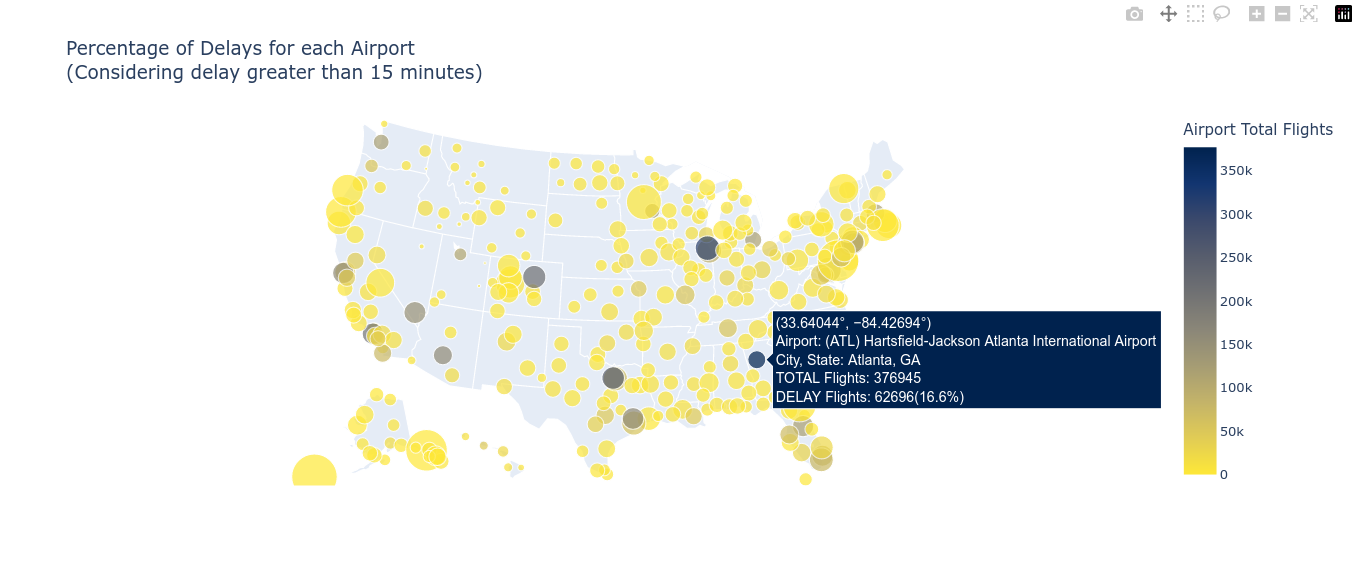

It's possible to visualize the airport located in Atlanta which has the biggest number of flights and only 16.6% delayed. The Airport ORD in Chicago seems to be the second biggest airport in terms of flights numbers and presents almost 23% delayed.

---
## **📊 Temporal Analysis of Delays**

> **Task**: _Analyze how flight delays varied throughout the year 2015. Create a line or bar chart showing the monthly variation of delays._


In [45]:
tab_delay_month = get_query_result('''
  SELECT
    MONTH,
    COUNT(DEPARTURE_DELAY) TOTAL_FLIGHTS,
    SUM(
      CASE WHEN DEPARTURE_DELAY > 15 THEN 1 ELSE 0 END
    ) AS DELAY_FLIGHTS
  FROM
    flights
  WHERE
    DEPARTURE_DELAY NOT NULL
  GROUP BY
    MONTH
''')


  SELECT
    MONTH,
    COUNT(DEPARTURE_DELAY) TOTAL_FLIGHTS,
    SUM(
      CASE WHEN DEPARTURE_DELAY > 15 THEN 1 ELSE 0 END
    ) AS DELAY_FLIGHTS
  FROM
    flights
  WHERE
    DEPARTURE_DELAY NOT NULL
  GROUP BY
    MONTH



,MONTH,TOTAL_FLIGHTS,DELAY_FLIGHTS
0,1,458311,87707
1,2,409132,88100
2,3,493673,91851
3,4,480898,76637
4,5,491657,86618
5,6,495199,113090
6,7,516211,106111
7,8,505817,92990
8,9,463018,56063
9,10,483826,57735


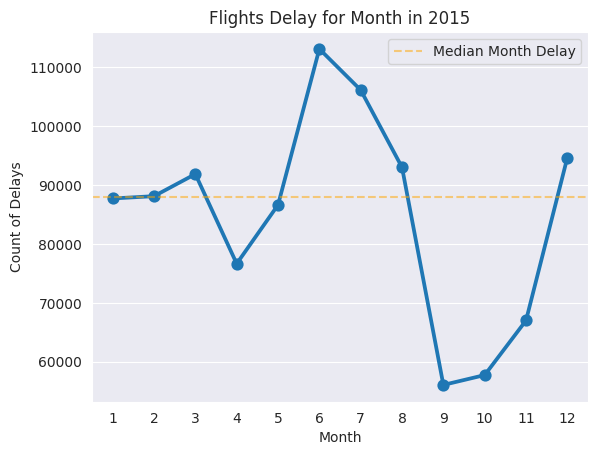

In [46]:
sns.set_style('darkgrid')

# Chart with Count of Delays (considering 15 minutes plus)
sns.pointplot(data=tab_delay_month, x="MONTH", y="DELAY_FLIGHTS")\
  .set(title='Flights Delay for Month in 2015', xlabel='Month', ylabel='Count of Delays')
plt.axhline(y=tab_delay_month.DELAY_FLIGHTS.median(),
            color='orange', linestyle='dashed', label='Median Month Delay', alpha=0.5)
plt.legend()
plt.show()

Maybe this oscilations have connection with seasons of the year.

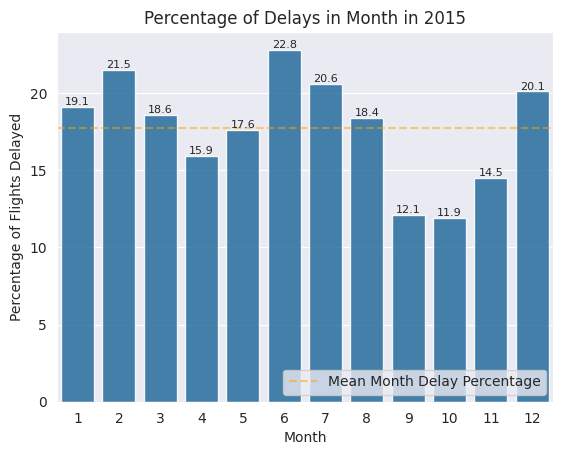

In [47]:
# Chart with Percentage of Delays in the Month (considering delay by flights delayed 15 minutes plus)
tab_delay_month['DELAY_PERCENTAGE'] = round(tab_delay_month['DELAY_FLIGHTS']/tab_delay_month['TOTAL_FLIGHTS']*100,1)

ax = sns.barplot(data=tab_delay_month, x="MONTH", y="DELAY_PERCENTAGE", alpha=0.9)
ax.bar_label(ax.containers[0], fontsize=8)
ax.set(title='Percentage of Delays in Month in 2015', xlabel='Month',ylabel='Percentage of Flights Delayed')
plt.axhline(y=tab_delay_month.DELAY_PERCENTAGE.mean(),
            color='orange', linestyle='dashed', label='Mean Month Delay Percentage', alpha=0.5)
plt.legend(loc='lower right')

In absolute values (first chart), it's possible to observe June and July as the months in the year of 2015 with most flights delayed. In the opposite side, September, October and November are the month with less flights delayed.

Despite that, if we analyse the percentage of flights delayed each month in 2015 (second chart), it's possible to see that February and June are the months with more flights delayed.

Note: It was considered delayed flights which ones with departure delay greater than 15 minutes.

# 3. Machine Learning Model Training

## Instructions for the Machine Learning Model Training Module

### Model Objective:
- Develop a Machine Learning model to predict flight delays. The target could be a binary variable indicating whether a flight will be delayed by more than 15 minutes, for example.

### Data Preprocessing:
- Perform data cleaning and preparation. This should include handling missing values, encoding categorical variables, normalizing or standardizing numerical variables, and possibly creating new features (feature engineering).

- Justify the preprocessing choices.

### Data Split:
- Divide the data into training and test sets.

### Model Selection and Training:
- Choose an appropriate model (e.g., logistic regression, decision trees, random forest, etc.).
- Train the model and optimize hyperparameters.

### Model Evaluation:
- Evaluate the model using appropriate metrics such as accuracy, recall, F1-score, AUC-ROC, etc.
- Provide an interpretation of the results and metrics.

### Insights and Improvements:
- Discuss possible insights gained from the model and suggestions for future improvements.

### Additional Considerations:
- You could use libraries like scikit-learn, XGboost, TensorFlow, or PyTorch, depending on the desired complexity level.
- Document each step, including the model choice and justification, as well as the interpretation of results.
- Consider asking for further exploration, like variable importance analysis or model error diagnostics.

---
## **◼ Data Preprocessing**

### Data Cleaning

In the ETL section, it was possible to analyse all columns in the raw data and the count of missing values for each one.

Notice that it's necessary to uniformize the code which appears in `ORIGIN_AIRPORT` and `DESTINATION_AIRPORT` from the raw data assign by 'flights' in the SQLite Database with the IATA code refereing to US DOT code present in 'IATA_USDOT_CODE' table in the database. It's because in the 'flights' table these cited columns are mixed with IATA code and US DOT code.

\
**🎯 Target Column**


First of all, let's determine the target column as  `ARRIVAL_DELAY` which means the minutes of flight delay at arrival time. However, let's consider the target as a binary classification based on the indicator of `ARRIVAL_DELAY` greater than 15 minutes.

\
**📥 Feature Variables**

Based on the target variable and considering the data leakage, let's consider the following:

Not cosidered columns ⛔:
- `YEAR`: all observations are in 2015;
- `DIVERTED`: don't make sense consider this column because of the data leakage (the scenario is to predict if the flight will be late or not in the destination airport, so we don't know the conclusion of the route - neither if it diverted or not);
- `AIR_TIME`: same explanation above, because this column shows the duration of the flight;
- `ELAPSED_TIME`, `WHEELS_ON`, `TAXI_IN`, `ARRIVAL_TIME`, `CANCELLED`, `CANCELLATION_REASON`: variables related to the end of the route (which is unknown in the problem).

Considered columns ✅:
- `MONTH`, `DAY`, `DAY_OF_WEEK`
- `AIRLINE`
- `FLIGHT_NUMBER`
- `TAIL_NUMBER`
- `ORIGIN_AIRPORT`, `DESTINATION_AIRPORT` (both with standard code of IATA)
- `SCHEDULED_DEPARTURE`, `DEPARTURE_TIME`, `DEPARTURE_DELAY`, `TAXI_OUT`, `WHEELS_OFF`
- `SCHEDULED_TIME`, `DISTANCE`, `SCHEDULED_ARRIVAL`
- `AIR_SYSTEM_DELAY`, `SECURITY_DELAY`, `AIRLINE_DELAY`, `LATE_AIRCRAFT_DELAY`, `WEATHER_DELAY`




In [48]:
# Block code to see contigency table of DEPARTURE DELAY with ARRIVAL DELAY
tab_delay_departure_arrival = get_query_result('''
  SELECT
    DEPARTURE_DELAY, ARRIVAL_DELAY
  FROM
    flights
  WHERE
    DEPARTURE_DELAY NOT NULL AND ARRIVAL_DELAY NOT NULL
''', verbose=False)

tab_delay_departure_arrival['delay_dep'] = (tab_delay_departure_arrival['DEPARTURE_DELAY']>15).astype(int)
tab_delay_departure_arrival['delay_arr'] = (tab_delay_departure_arrival['ARRIVAL_DELAY']>15).astype(int)

pd.crosstab(tab_delay_departure_arrival['delay_dep'], tab_delay_departure_arrival['delay_arr'],
            rownames=['DELAY DEPARTURE'], colnames=['DELAY ARRIVAL'])

DELAY ARRIVAL,0,1
DELAY DEPARTURE,,
0,4482586,219835
1,207924,803663


The contigency table above shows that a trip with departure delay not always result in arrival delay, but has a huge influence.

In [49]:
# Getting the whole data into parts to minimize the upload memory
# supressing float columns for now
df = get_query_result('''
  SELECT
      MONTH, DAY, DAY_OF_WEEK, AIRLINE, FLIGHT_NUMBER, TAIL_NUMBER,
      SCHEDULED_DEPARTURE, DEPARTURE_TIME, WHEELS_OFF, DISTANCE, SCHEDULED_ARRIVAL
  FROM
    flights
  WHERE
    ARRIVAL_DELAY NOT NULL
  ORDER BY
    MONTH ASC, DAY ASC
''', verbose=False)

df['ORIGIN_AIRPORT'] = (get_query_result('''
  SELECT
    CASE
      WHEN IATA_CODE IS NULL THEN ORIGIN_AIRPORT
      ELSE IATA_CODE
    END ORIGIN_AIRPORT_IATA
  FROM
    flights a LEFT JOIN IATA_USDOT_CODE b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
  WHERE
    ARRIVAL_DELAY NOT NULL
  ORDER BY
    MONTH ASC, DAY ASC
''', verbose=False))['ORIGIN_AIRPORT_IATA']

df['DESTINATION_AIRPORT'] = (get_query_result('''
  SELECT
    CASE
      WHEN IATA_CODE IS NULL THEN DESTINATION_AIRPORT
      ELSE IATA_CODE
    END DESTINATION_AIRPORT_IATA
  FROM
    flights a LEFT JOIN IATA_USDOT_CODE b ON a.DESTINATION_AIRPORT = b.USDOT_CODE
  WHERE
    ARRIVAL_DELAY NOT NULL
  ORDER BY
    MONTH ASC, DAY ASC
''', verbose=False))['DESTINATION_AIRPORT_IATA']

df[['ARRIVAL_DELAY','DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = get_query_result('''
  SELECT
    ARRIVAL_DELAY, DEPARTURE_DELAY, TAXI_OUT, SCHEDULED_TIME, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY
  FROM
    flights
  WHERE
    ARRIVAL_DELAY NOT NULL
  ORDER BY
    MONTH ASC, DAY ASC
''', verbose=False)

conn.close() # exit the SQLite connection to make the next steps
display(df)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF,DISTANCE,SCHEDULED_ARRIVAL,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,98,N407AS,0005,2354,0015,1448,0430,ANC,SEA,-22.0,-11.0,21.0,205.0,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,2336,N3KUAA,0010,0002,0014,2330,0750,LAX,PBI,-9.0,-8.0,12.0,280.0,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,840,N171US,0020,0018,0034,2296,0806,SFO,CLT,5.0,-2.0,16.0,286.0,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,258,N3HYAA,0020,0015,0030,2342,0805,LAX,MIA,-9.0,-5.0,15.0,285.0,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,135,N527AS,0025,0024,0035,1448,0320,SEA,ANC,-21.0,-1.0,11.0,235.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,12,31,4,B6,688,N657JB,2359,2355,0017,2611,0819,LAX,BOS,-26.0,-4.0,22.0,320.0,NaN,NaN,NaN,NaN,NaN
5714004,12,31,4,B6,745,N828JB,2359,2355,0012,1617,0446,JFK,PSE,-16.0,-4.0,17.0,227.0,NaN,NaN,NaN,NaN,NaN
5714005,12,31,4,B6,1503,N913JB,2359,2350,0007,1598,0440,JFK,SJU,-8.0,-9.0,17.0,221.0,NaN,NaN,NaN,NaN,NaN
5714006,12,31,4,B6,333,N527JB,2359,2353,0003,1189,0340,MCO,SJU,-10.0,-6.0,10.0,161.0,NaN,NaN,NaN,NaN,NaN


In [50]:
# delete variables created before
dellist = %who_ls
ip=get_ipython()
user_ns=ip.user_ns

# variables to mantain
dellist.remove('df')
dellist.remove('pd')
dellist.remove('np')
dellist.remove('plt')
dellist.remove('sns')
dellist.remove('warnings')

for i in dellist:
  del(user_ns[i])

del(ip, user_ns, dellist)

In [51]:
# Importing libraries for model training and preprocessing
import gc # garbage collect (free memory)
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pyarrow.parquet as pq # load test parquet file
import pickle # save model trained

In [52]:
gc.collect() # clean memory

137105

In [53]:
# Let's begin the treatments
df.rename(str.lower, axis='columns', inplace=True) # not capitalize column names

# Tranform target variable to indicator of delay greater than 15 minutes
df['arrival_delay'] = (df['arrival_delay'] > 15).astype(int)

# converting all numeric columns into integer type
df[['arrival_delay',
    'taxi_out',
    'scheduled_time']] = df[['arrival_delay',
                             'taxi_out',
                             'scheduled_time']].astype(int)

# decreasing bytes for float variables
df[['air_system_delay',
    'security_delay',
    'airline_delay',
    'late_aircraft_delay',
    'departure_delay',
    'weather_delay']] = df[['air_system_delay',
                            'security_delay',
                            'airline_delay',
                            'late_aircraft_delay',
                            'departure_delay',
                            'weather_delay']].astype('float32')

In [54]:
# Showing unique values for categorical columns
for col in ['month', 'day_of_week', 'airline', 'tail_number', 'origin_airport', 'destination_airport']:
  unique_vals = df[col].unique()
  if len(unique_vals) > 20:
    print(f'Variable --{col}-- with {len(unique_vals)} categories: ', unique_vals[1:10], ' ...')
  else:
    print(f'Variable --{col}-- with {len(unique_vals)} categories: ', unique_vals)
  print('\n')
  del unique_vals

Variable --month-- with 12 categories:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


Variable --day_of_week-- with 7 categories:  [4 5 6 7 1 2 3]


Variable --airline-- with 14 categories:  ['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'F9' 'WN' 'MQ' 'VX']


Variable --tail_number-- with 4896 categories:  ['N3KUAA' 'N171US' 'N3HYAA' 'N527AS' 'N3730B' 'N635NK' 'N584UW' 'N3LAAA'
 'N826DN']  ...


Variable --origin_airport-- with 322 categories:  ['LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 'FAI' 'MSP']  ...


Variable --destination_airport-- with 322 categories:  ['PBI' 'CLT' 'MIA' 'ANC' 'MSP' 'DFW' 'ATL' 'IAH' 'PDX']  ...




The following link contains the explanation about tail number registration: https://www.faa.gov/licenses_certificates/aircraft_certification/aircraft_registry/forming_nnumber

Basically, they all need to have a prefix N and then a sequential characteres. In the site below, it's possible to identify the aircraft identifier by the tail number (without considering the prefix N): https://registry.faa.gov/aircraftinquiry/Search/NNumberResult

According to https://en.wikipedia.org/wiki/List_of_aircraft_registration_prefixes#cite_note-:2-1 there is some ways to register USA aircrafts like:
N1 to N99999,
N1A to N9999Z,
N1AA to N999ZZ.

In [55]:
# Trying to identify tail_number pattern
print(df.tail_number.str.len().unique()) # lenght of the tails numbers

print(df.tail_number.str[0].unique()) # prefix presented in the column tail number data
# Let's look at 'D' and '7' prefix

display(df[df.tail_number.str[0]=='D']) # By a search, D942DN is one of DL Airline and maybe changed the N prefix to D prefix

display(df[df.tail_number.str[0]=='7']) # In this case, it seems the N prefix was omitted
# So only needs to add 'N' prefix

df.loc[df.tail_number.str[0]=='7','tail_number'] = 'N' + df.loc[df.tail_number.str[0]=='7','tail_number']


[6 5]
['N' 'D' '7']


,month,day,day_of_week,airline,flight_number,tail_number,scheduled_departure,departure_time,wheels_off,distance,scheduled_arrival,origin_airport,destination_airport,arrival_delay,departure_delay,taxi_out,scheduled_time,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
954531,3,7,6,DL,1056,D942DN,0615,0613,0628,1576,1156,SJC,MSP,0,-2.0,15,221,NaN,NaN,NaN,NaN,NaN
960610,3,7,6,DL,785,D942DN,1300,1259,1318,907,1626,MSP,ATL,0,-1.0,19,146,NaN,NaN,NaN,NaN,NaN
964539,3,7,6,DL,743,D942DN,1730,1729,1742,356,1856,ATL,RDU,1,-1.0,13,86,25.0,0.0,0.0,0.0,0.0
969356,3,8,7,DL,1482,D942DN,0710,0704,0721,356,0850,RDU,ATL,0,-6.0,17,100,NaN,NaN,NaN,NaN,NaN
971408,3,8,7,DL,2146,D942DN,0915,0940,0959,749,1120,ATL,ROC,1,25.0,19,125,0.0,0.0,22.0,0.0,0.0
974042,3,8,7,DL,2146,D942DN,1200,1225,1237,749,1420,ROC,ATL,0,25.0,12,140,NaN,NaN,NaN,NaN,NaN
977458,3,8,7,DL,950,D942DN,1530,1529,1552,406,1658,ATL,TPA,0,-1.0,23,88,NaN,NaN,NaN,NaN,NaN
979759,3,8,7,DL,950,D942DN,1745,1744,1753,406,1927,TPA,ATL,0,-1.0,9,102,NaN,NaN,NaN,NaN,NaN
981918,3,8,7,DL,791,D942DN,1957,2017,2035,484,2046,ATL,STL,1,20.0,18,109,0.0,0.0,16.0,0.0,0.0


,month,day,day_of_week,airline,flight_number,tail_number,scheduled_departure,departure_time,wheels_off,distance,scheduled_arrival,origin_airport,destination_airport,arrival_delay,departure_delay,taxi_out,scheduled_time,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
2979264,7,10,5,WN,3228,7819A,1930,1942,1951,1449,0045,PHX,BNA,0,12.0,9,195,NaN,NaN,NaN,NaN,NaN
2982378,7,11,6,WN,1782,7819A,0600,0556,0605,764,0910,BNA,LGA,0,-4.0,9,130,NaN,NaN,NaN,NaN,NaN
2986047,7,11,6,WN,4271,7819A,0940,0944,0958,888,1125,LGA,STL,0,4.0,14,165,NaN,NaN,NaN,NaN,NaN
2988198,7,11,6,WN,4271,7819A,1200,1156,1205,484,1435,STL,ATL,0,-4.0,9,95,NaN,NaN,NaN,NaN,NaN
2992920,7,11,6,WN,4271,7819A,1720,1944,1951,488,1755,TPA,MSY,1,144.0,7,95,0.0,0.0,27.0,97.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700110,12,30,3,WN,1535,7820L,2140,2316,2325,787,2350,MCO,BWI,1,96.0,9,130,0.0,0.0,0.0,79.0,0.0
5702407,12,31,4,WN,5565,7820L,0700,0655,0708,289,0815,BWI,ALB,0,-5.0,13,75,NaN,NaN,NaN,NaN,NaN
5703979,12,31,4,WN,5565,7820L,0845,0840,0850,1204,1210,ALB,FLL,0,-5.0,10,205,NaN,NaN,NaN,NaN,NaN
5707783,12,31,4,WN,5565,7820L,1255,1256,1308,581,1450,FLL,ATL,0,1.0,12,115,NaN,NaN,NaN,NaN,NaN


It's possible to set for missing values in columns of delay reason (`AIR_SYSTEM_DELAY`, `SECURITY_DELAY`, `AIRLINE_DELAY`, `LATE_AIRCRAFT_DELAY`, `WEATHER_DELAY`) the value -0.1 if departure_delay is less than 0 (it means flight not delayed), and value 0 if delay is grater than 0 but all these features are null (meaning another delay reason).

This configuration is good for models like random forest, because can diversify trips with a explicity delay (weather, security, etc.) and trips with no delay. Furthermore, models like regression logistic will consider that information as almost the same, but whit a little bit divergence. Because of this, is a good inputation for the models that will be trained.

In [56]:
df.isna().sum() # before the inputation

month                        0
day                          0
day_of_week                  0
airline                      0
flight_number                0
tail_number                  0
scheduled_departure          0
departure_time               0
wheels_off                   0
distance                     0
scheduled_arrival            0
origin_airport               0
destination_airport          0
arrival_delay                0
departure_delay              0
taxi_out                     0
scheduled_time               0
air_system_delay       4650569
security_delay         4650569
airline_delay          4650569
late_aircraft_delay    4650569
weather_delay          4650569
dtype: int64

In [57]:
df.loc[df['departure_delay']<=0,\
 ['air_system_delay','security_delay','airline_delay','late_aircraft_delay','weather_delay']]=-0.1

df.loc[df[['air_system_delay','security_delay','airline_delay','late_aircraft_delay','weather_delay']].isnull().all(axis=1),\
 ['air_system_delay','security_delay','airline_delay','late_aircraft_delay','weather_delay']]=0

In [58]:
df.isna().sum() # after the inputation

month                  0
day                    0
day_of_week            0
airline                0
flight_number          0
tail_number            0
scheduled_departure    0
departure_time         0
wheels_off             0
distance               0
scheduled_arrival      0
origin_airport         0
destination_airport    0
arrival_delay          0
departure_delay        0
taxi_out               0
scheduled_time         0
air_system_delay       0
security_delay         0
airline_delay          0
late_aircraft_delay    0
weather_delay          0
dtype: int64

---
## **◼ Feature Engineering**

Now, let's consider creating some variables and make enconder transformation to the categoricals.

So let's make the following:

- Create a feature assign `route` that concatenates `origin_airport` and `destination_airport`. This will be for the model fit a weight not only for the origin and destination airports separated, but also with the route trip.

- Get all time variables (in format of HH:MM) and split into hour of the time and minutes. Then, consider minutes as one third hour, two thirds hour, and three thirds hour. So spliting hour into three parts to represent minutes range. In addition to it, let's add a variable called by `day_period` considering spliting the hour time into four periods. The periods of hour are:
  - _dawn_: 00h |- 06h  
  - _morning_: 06h |- 12h
  - _afternoon_: 12h |- 18h
  - _night_: 18h |- 00h

- Summer break happens with a peak in June and  July, so it's possible to create a varible indicating  season year, and summer break is included:  
  - Spring months [1]: March, April, May
  - Summer months [2]: June, July, August
  - Fall months [3]: September, October, November
  - Winter months [4]: December, January, February


In [59]:
# Create variable route
df['route'] = df['origin_airport'] + df['destination_airport']

In [60]:
time_columns = ['scheduled_departure', 'departure_time', 'wheels_off', 'scheduled_arrival']

for col in time_columns:
  # Getting minutes-day part
  df[f'{col}_thirdhour'] = np.where(
      df[f'{col}']\
        .str[2:]\
        .astype(int)\
        .between(0, 21, inclusive='left'),
      1,
      np.where(
        df[f'{col}']\
        .str[2:]\
        .astype(int)\
        .between(21, 40, inclusive='left'),
      2,
      3
      )
  )

  # Getting hour
  df[f'{col}_hour'] = df[f'{col}']\
    .str[:2]\
    .replace('24','0')\
    .astype(int)

  # Getting day period
  df[f'{col}_dayperiod'] = np.where(
      df[f'{col}_hour']\
        .between(0, 7, inclusive='left'),
      'dawn',
      np.where(
        df[f'{col}_hour']\
        .between(7, 13, inclusive='left'),
      'morning',
      np.where(
        df[f'{col}_hour']\
        .between(13, 19, inclusive='left'),
      'afternoon',
      'night'
      )
    )
  )

  # Drop raw column
  df.drop(columns={col}, inplace=True)

gc.collect()

19970

In [61]:
df['season'] = \
        np.where(df.month.between(3, 5, inclusive='both'),1,
          np.where(df.month.between(6, 8, inclusive='both'),2,
            np.where(df.month.between(9, 11, inclusive='both'),3,
                     4)
          )
         )

We can either get pattern in 'tail_number' feature, looking the lenght of numbers and letters in the aircraft identifier.

In [62]:
df['tail_number5p']=(df['tail_number'].str.len() > 5).astype(int)

In [63]:
display(df.head())

print(df.columns)

,month,day,day_of_week,airline,flight_number,tail_number,distance,origin_airport,destination_airport,arrival_delay,departure_delay,taxi_out,scheduled_time,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,route,scheduled_departure_thirdhour,scheduled_departure_hour,scheduled_departure_dayperiod,departure_time_thirdhour,departure_time_hour,departure_time_dayperiod,wheels_off_thirdhour,wheels_off_hour,wheels_off_dayperiod,scheduled_arrival_thirdhour,scheduled_arrival_hour,scheduled_arrival_dayperiod,season,tail_number5p
0,1,1,4,AS,98,N407AS,1448,ANC,SEA,0,-11.0,21,205,-0.1,-0.1,-0.1,-0.1,-0.1,ANCSEA,1,0,dawn,3,23,night,1,0,dawn,2,4,dawn,4,1
1,1,1,4,AA,2336,N3KUAA,2330,LAX,PBI,0,-8.0,12,280,-0.1,-0.1,-0.1,-0.1,-0.1,LAXPBI,1,0,dawn,1,0,dawn,1,0,dawn,3,7,morning,4,1
2,1,1,4,US,840,N171US,2296,SFO,CLT,0,-2.0,16,286,-0.1,-0.1,-0.1,-0.1,-0.1,SFOCLT,1,0,dawn,1,0,dawn,2,0,dawn,1,8,morning,4,1
3,1,1,4,AA,258,N3HYAA,2342,LAX,MIA,0,-5.0,15,285,-0.1,-0.1,-0.1,-0.1,-0.1,LAXMIA,1,0,dawn,1,0,dawn,2,0,dawn,1,8,morning,4,1
4,1,1,4,AS,135,N527AS,1448,SEA,ANC,0,-1.0,11,235,-0.1,-0.1,-0.1,-0.1,-0.1,SEAANC,2,0,dawn,2,0,dawn,2,0,dawn,1,3,dawn,4,1


Index(['month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'distance', 'origin_airport', 'destination_airport',
       'arrival_delay', 'departure_delay', 'taxi_out', 'scheduled_time',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay', 'route',
       'scheduled_departure_thirdhour', 'scheduled_departure_hour',
       'scheduled_departure_dayperiod', 'departure_time_thirdhour',
       'departure_time_hour', 'departure_time_dayperiod',
       'wheels_off_thirdhour', 'wheels_off_hour', 'wheels_off_dayperiod',
       'scheduled_arrival_thirdhour', 'scheduled_arrival_hour',
       'scheduled_arrival_dayperiod', 'season', 'tail_number5p'],
      dtype='object')


Now let's enconding the variables as following explanation:

- `*_thirdhour`
- `*_dayperiod`
- `day_of_week`
- `month`
- `airline`

with one-hot-enconding, and:

- `*_hour`
- `tail_number`
- `route`
- `day`
- `origin_airport`
- `destination_airport`

with K-Fold TargetEncoder which will consider the proportion with target variable, but with a cross fitting of 5 folders to try to avoid overfitting.

The others variables will be considered numeric, by making a normalization in max-min scale. The variables `flight_number`, `distance`, `taxi_out`, `scheduled_time` in range [0,1], and the variables `departure_delay`, `air_system_delay`, `security_delay`, `airline_delay`, `late_aircraft_delay`, `weather_delay` in range [-1,1] by MaxAbsScaler.


In [64]:
# features decrease type bits
print('Before change type format of some features:\n')
print(df.info())
df = df.astype({'month':'int8','day':'int8','day_of_week':'int8','arrival_delay':'bool',\
                'tail_number5p':'bool', 'scheduled_departure_thirdhour':'int8',\
                'scheduled_departure_hour':'int8','departure_time_thirdhour':'int8',\
                'departure_time_hour':'int8','wheels_off_thirdhour':'int8', 'wheels_off_hour':'int8',\
                'scheduled_arrival_thirdhour':'int8','scheduled_arrival_hour':'int8','season':'int8'})
print('\n\nAfter change type format of some features:\n')
print(df.info())

Before change type format of some features:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 33 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   month                          int64  
 1   day                            int64  
 2   day_of_week                    int64  
 3   airline                        object 
 4   flight_number                  int64  
 5   tail_number                    object 
 6   distance                       int64  
 7   origin_airport                 object 
 8   destination_airport            object 
 9   arrival_delay                  int64  
 10  departure_delay                float32
 11  taxi_out                       int64  
 12  scheduled_time                 int64  
 13  air_system_delay               float64
 14  security_delay                 float64
 15  airline_delay                  float64
 16  late_aircraft_delay            float64
 17  w

Also before the enconding transformation, let's save the 3 last months of the dataset to evaluate the model. So, the months of October, November and December are saved in 'test.parquet' file and the remaining dataframe will be transformed with enconding.

This procedure enables to attends to data leakage, so unseen categories in train model won't be enconding before and when evaluate the model, this unseen categories enters in input like "neutrals". This also helps the memory of notebook with less data to process.

In [65]:
# Saving a parquet test set file
df.query('month >= 10').to_parquet('test.parquet')
df = df.query('month < 10')
gc.collect()

34

Documentation for TargetEncoder by KFold and OneHotEncoder in Scikit-learn:

  [TargetEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html#sklearn.preprocessing.TargetEncoder)

  [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)
  

In [66]:
enc_target = TargetEncoder(smooth="auto", random_state=0)

encoder_target_list = [
    'scheduled_departure_hour',
    'departure_time_hour',
    'wheels_off_hour',
    'scheduled_arrival_hour',
    'tail_number',
    'day',
    'route',
    'origin_airport',
    'destination_airport']

df[encoder_target_list] = enc_target\
  .fit_transform(df[encoder_target_list], df['arrival_delay'])\
  .astype('float32')

In [67]:
enc_hot = OneHotEncoder(handle_unknown = 'ignore')

encoder_onehot_list = ['scheduled_departure_thirdhour',
                       'scheduled_departure_dayperiod',
                       'departure_time_thirdhour',
                       'departure_time_dayperiod',
                       'wheels_off_thirdhour',
                       'wheels_off_dayperiod',
                       'scheduled_arrival_thirdhour',
                       'scheduled_arrival_dayperiod',
                       'day_of_week',
                       'month',
                       'airline',
                       'season']


onehot_columns = pd.DataFrame(enc_hot.fit_transform(df[encoder_onehot_list]).toarray(), dtype='bool')
onehot_columns.columns = enc_hot.get_feature_names_out() # change column names

df.drop(columns=encoder_onehot_list, inplace=True)
df = df.join(onehot_columns)
del onehot_columns

Documentation of [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) and [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler).

In [68]:
scale_maxabs = MaxAbsScaler()
scale_maxabs_list = ['departure_delay',
                     'air_system_delay',
                     'security_delay',
                     'airline_delay',
                     'late_aircraft_delay',
                     'weather_delay']

df[scale_maxabs_list] = scale_maxabs.fit_transform(df[scale_maxabs_list])

scale_minmax = MinMaxScaler()
scale_minmax_list = ['flight_number',
                     'distance',
                     'taxi_out',
                     'scheduled_time']


df[scale_minmax_list] = scale_minmax.fit_transform(df[scale_minmax_list])

In [69]:
gc.collect()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4299046 entries, 0 to 4299045
Data columns (total 83 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   day                                      float32
 1   flight_number                            float64
 2   tail_number                              float32
 3   distance                                 float64
 4   origin_airport                           float32
 5   destination_airport                      float32
 6   arrival_delay                            bool   
 7   departure_delay                          float64
 8   taxi_out                                 float64
 9   scheduled_time                           float64
 10  air_system_delay                         float64
 11  security_delay                           float64
 12  airline_delay                            float64
 13  late_aircraft_delay                      float64
 14  weather_delay     

,day,flight_number,tail_number,distance,origin_airport,destination_airport,arrival_delay,departure_delay,taxi_out,scheduled_time,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,route,scheduled_departure_hour,departure_time_hour,wheels_off_hour,scheduled_arrival_hour,tail_number5p,scheduled_departure_thirdhour_1,scheduled_departure_thirdhour_2,scheduled_departure_thirdhour_3,scheduled_departure_dayperiod_afternoon,scheduled_departure_dayperiod_dawn,scheduled_departure_dayperiod_morning,scheduled_departure_dayperiod_night,departure_time_thirdhour_1,departure_time_thirdhour_2,departure_time_thirdhour_3,departure_time_dayperiod_afternoon,departure_time_dayperiod_dawn,departure_time_dayperiod_morning,departure_time_dayperiod_night,wheels_off_thirdhour_1,wheels_off_thirdhour_2,wheels_off_thirdhour_3,wheels_off_dayperiod_afternoon,wheels_off_dayperiod_dawn,wheels_off_dayperiod_morning,wheels_off_dayperiod_night,scheduled_arrival_thirdhour_1,scheduled_arrival_thirdhour_2,scheduled_arrival_thirdhour_3,scheduled_arrival_dayperiod_afternoon,scheduled_arrival_dayperiod_dawn,scheduled_arrival_dayperiod_morning,scheduled_arrival_dayperiod_night,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,airline_AA,airline_AS,airline_B6,airline_DL,airline_EV,airline_F9,airline_HA,airline_MQ,airline_NK,airline_OO,airline_UA,airline_US,airline_VX,airline_WN,season_1,season_2,season_3,season_4
0,0.199886,0.010409,0.104907,0.286147,0.113911,0.153986,False,-0.005533,0.089286,0.267143,-0.000088,-0.000175,-0.000051,-0.000075,-0.000087,0.089398,0.153964,0.449630,0.422513,0.171994,True,True,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,0.199615,0.250563,0.180656,0.464257,0.204238,0.225329,False,-0.004024,0.049107,0.374286,-0.000088,-0.000175,-0.000051,-0.000075,-0.000087,0.294578,0.153885,0.432240,0.423804,0.087928,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0.200936,0.090031,0.196770,0.457391,0.193373,0.153203,False,-0.001006,0.066964,0.382857,-0.000088,-0.000175,-0.000051,-0.000075,-0.000087,0.110399,0.152746,0.432072,0.424303,0.097271,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,0.200584,0.027578,0.189695,0.466680,0.204278,0.203691,False,-0.002515,0.062500,0.381429,-0.000088,-0.000175,-0.000051,-0.000075,-0.000087,0.212665,0.150781,0.430851,0.422584,0.097790,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.200936,0.014379,0.100589,0.286147,0.155121,0.167539,False,-0.000503,0.044643,0.310000,-0.000088,-0.000175,-0.000051,-0.000075,-0.000087,0.162975,0.152746,0.432072,0.424303,0.263452,True,False,True,False,False,True,False,False,False,True,False,False,True,F

---

## **◼ Model Selection and Training**

Let's consider a Logist Regression model, but using the equivalent model Stochastic Gradient Descent Classifier with log loss cost function which is more apropriate to memory performance.

It'll be considered using a cross validation in time series split to respect the cronological aspect of the data. So, the entire train dataset will be split in 5 folders and works like the figure below.

A lot of combinations of hyperparameters will be use, such as regularization parameters in elastic-net, learning rate of the classifier, and also a class weight for the target classes.



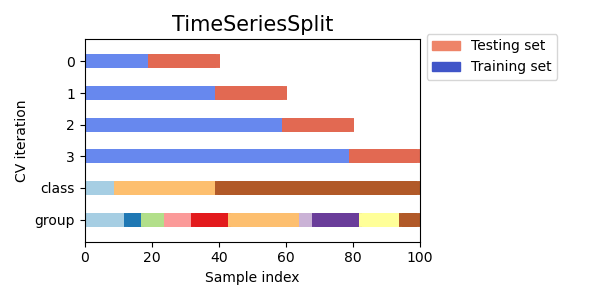

Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

The main goal is predicted the most flights with delayed arrival, and, less as possible predicted flights with no delay arrival, but actually is delayed. So, for this reason, it's important to make a search of hyperparameters to optmize the recall score (True Positive/Positive) and with a good average of AUC-ROC which demonstrate the model is good with true positive rate (recall) and false positive rate. This metric will helps to find best weight of target classes and the best learning rate used as `eta0` parameter in the code.

After that, the metric F1-score which consider harmonic mean of precision and sensibility will be used to help find the best parameters of regularization.

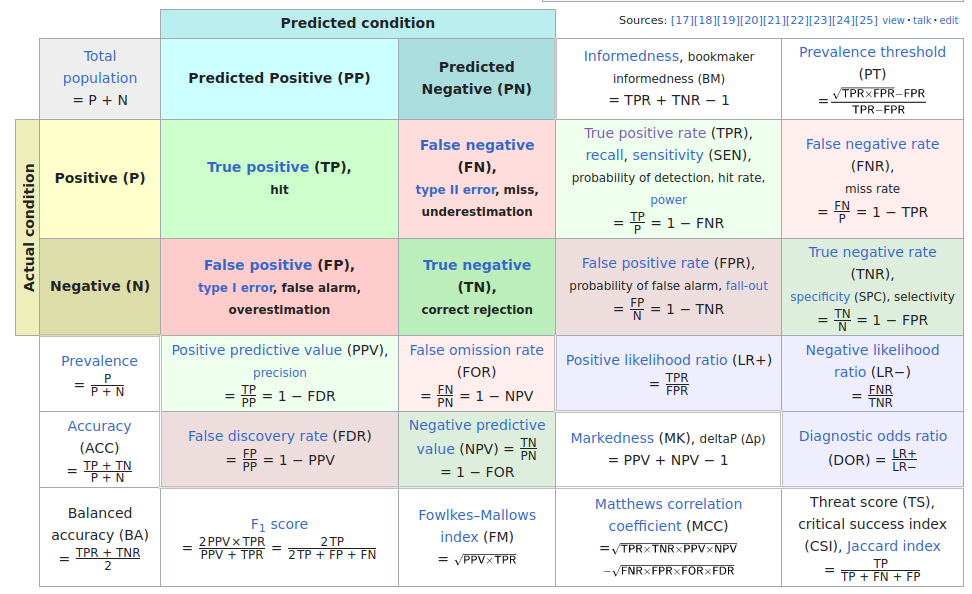

Source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

Let's use hyperparameter techniques to find the best learning rate and best weights for the target classes. After this, will be done a fine tuning to know the others parameters of regularization.

Note: for each combination of `eta0` (learning rate) and weight of target class, it's calculated the mean of AUC metric to get those combinations with biggest oscilations and priorize those with less oscilations of the metric and with highest values. The same happens with alpha and L1 ratio parameters bu with considering F1-Score to increase precision and sensitivity rates.

Stochastic Gradient Descent source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Mathematical explanation: https://scikit-learn.org/stable/modules/sgd.html

The main idea of find best weight to the train model is to ajust the linear predictor best for both class (0 which represents flight not delayed and 1 represents flight with arrival delay greater than 15 minutes). So, the data is unbalanced and then this parameter helps to predict the minor class.

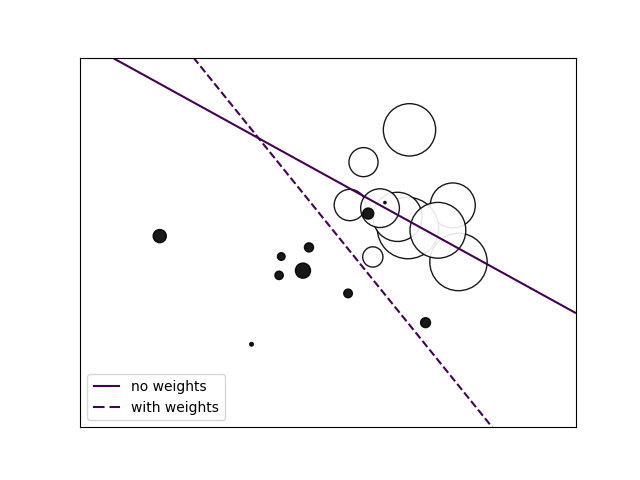

[Figure source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_weighted_samples.html#sphx-glr-auto-examples-linear-model-plot-sgd-weighted-samples-py)

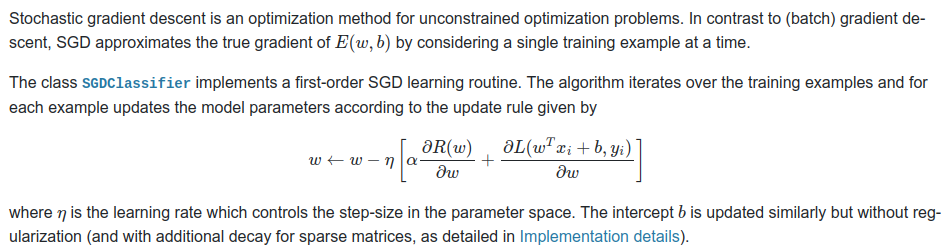

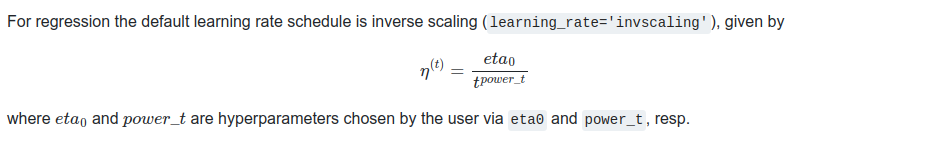

In [70]:
# getting explicative variables
vars = df.columns.tolist()
vars.remove('arrival_delay')

In [71]:
parameters = []
roc_auc_avg = []
for eta0 in [1e2,1e3,1e4]:
  for w in [.5,.6,.7,.8]:
    parameters.append({'eta0':eta0,'class_weight':w})

    # reset fit for each combination of parameters
    try:
      del sgd
    except:
      pass

    sgd = SGDClassifier(random_state=0,
                        loss='log_loss',
                        n_jobs=-1,
                        class_weight={0:1-w,1:w},
                        penalty='elasticnet',
                        alpha=0, #regularization multiplier disconsidered at first
                        learning_rate = 'invscaling',
                        eta0=eta0, #learning-rate initial
                        warm_start=False
                        )

    tscv = TimeSeriesSplit() # let's get 5 folders of the train set

    roc_auc_folders = []

    last_old = 0 # first row of the folder not trained
    for (train_idx, val_idx) in tscv.split(df):
      last_now = train_idx[-1] # last index of the new folder

      X_train, y_train = (df.loc[last_old:last_now,vars], df.loc[last_old:last_now,'arrival_delay'])
      X_val, y_val = (df.loc[val_idx,vars], df.loc[val_idx,'arrival_delay'])

      last_old = train_idx[-1] # first index of the next folder not trained

      # partial fit utilizing previous folder already fit (better perfomance)
      sgd.partial_fit(X_train, y_train, classes=[0,1])

      roc_auc = roc_auc_score(y_val, sgd.predict_proba(X_val)[:,1])
      roc_auc_folders.append(roc_auc)

    roc_auc_avg.append(np.mean(roc_auc_folders)) # mean roc_auc of folders to be sensitive with huge oscilations
    print(f'eta0:\t\t\t{eta0}\nclass weight:\t\t{w}\nroc-auc average:\t{np.mean(roc_auc_folders)}\n\n')

idx_better_rocauc = roc_auc_avg.index(max(roc_auc_avg))
eta0 = parameters[idx_better_rocauc]['eta0']
w = parameters[idx_better_rocauc]['class_weight']
print(f'\n\n--> Based on AUC metric, best eta0 and class weight are: {eta0} and {w} resp.')

eta0:			100.0
class weight:		0.5
roc-auc average:	0.9626254426843248


eta0:			100.0
class weight:		0.6
roc-auc average:	0.9639102260281576


eta0:			100.0
class weight:		0.7
roc-auc average:	0.9641864089586237


eta0:			100.0
class weight:		0.8
roc-auc average:	0.9633841698717134


eta0:			1000.0
class weight:		0.5
roc-auc average:	0.9713456668794848


eta0:			1000.0
class weight:		0.6
roc-auc average:	0.9718659122769548


eta0:			1000.0
class weight:		0.7
roc-auc average:	0.9720902179461964


eta0:			1000.0
class weight:		0.8
roc-auc average:	0.9720667776356038


eta0:			10000.0
class weight:		0.5
roc-auc average:	0.9637645203015085


eta0:			10000.0
class weight:		0.6
roc-auc average:	0.9597520744964333


eta0:			10000.0
class weight:		0.7
roc-auc average:	0.956949989744405


eta0:			10000.0
class weight:		0.8
roc-auc average:	0.951350030054637




--> Based on AUC metric, best eta0 and class weight are: 1000.0 and 0.7 resp.


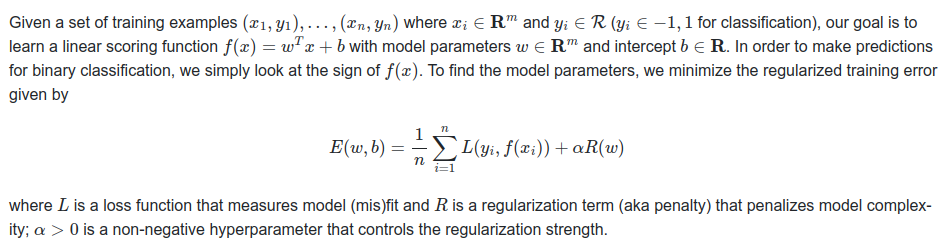

image.png

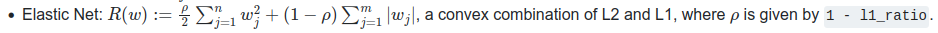

All these printed formulas are in https://scikit-learn.org/stable/modules/sgd.html

In [72]:
reg_parameters = []
f1_score_avg = []

for alpha in [1e-4, 1e-5, 1e-6]:
  for l1_ratio in [0,.3,.7,1]:
    reg_parameters.append({'alpha':alpha,'l1_ratio':l1_ratio})

    # reset fit for each combination of parameters
    try:
      del sgd
    except:
      pass

    sgd = SGDClassifier(random_state=0,
                        loss='log_loss',
                        n_jobs=-1,
                        class_weight={0:1-w,1:w},
                        penalty='elasticnet',
                        alpha=alpha, #regularization multiplier
                        l1_ratio=l1_ratio, #L1 weight in regularization
                        learning_rate = 'invscaling',
                        eta0=eta0, #learning-rate initial
                        warm_start=False
                        )

    tscv = TimeSeriesSplit() # let's get 5 folders of the train set

    f1_score_folders = []

    last_old = 0 # first row of the folder not trained
    for (train_idx, val_idx) in tscv.split(df):
      last_now = train_idx[-1] # last index of the new folder

      X_train, y_train = (df.loc[last_old:last_now,vars], df.loc[last_old:last_now,'arrival_delay'])
      X_val, y_val = (df.loc[val_idx,vars], df.loc[val_idx,'arrival_delay'])

      last_old = train_idx[-1] # first index of the next folder not trained

      # partial fit utilizing previous folder already fit (better perfomance)
      sgd.partial_fit(X_train, y_train, classes=[0,1])

      f1_metric = f1_score(y_val, sgd.predict(X_val))
      f1_score_folders.append(f1_metric)

    f1_score_avg.append(np.mean(f1_score_folders)) # mean f1-score of folders to be sensitive with huge oscilations
    print(f'alpha:\t\t\t{alpha}\nL1 ratio:\t\t{l1_ratio}\nF1 score average:\t{np.mean(f1_score_folders)}\n\n')

idx_better_f1score = f1_score_avg.index(max(f1_score_avg))
alpha = reg_parameters[idx_better_f1score]['alpha']
l1_ratio = reg_parameters[idx_better_f1score]['l1_ratio']
print(f'\n\n--> Based on F1-Score metric, best alpha and L1 ratio are: {alpha} and {l1_ratio} resp.')

alpha:			0.0001
L1 ratio:		0
F1 score average:	0.3996452772218533


alpha:			0.0001
L1 ratio:		0.3
F1 score average:	0.46942760027012753


alpha:			0.0001
L1 ratio:		0.7
F1 score average:	0.552817533858599


alpha:			0.0001
L1 ratio:		1
F1 score average:	0.8457662211468678


alpha:			1e-05
L1 ratio:		0
F1 score average:	0.5764429415443593


alpha:			1e-05
L1 ratio:		0.3
F1 score average:	0.6648108153211133


alpha:			1e-05
L1 ratio:		0.7
F1 score average:	0.7591474920777881


alpha:			1e-05
L1 ratio:		1
F1 score average:	0.8854285483160655


alpha:			1e-06
L1 ratio:		0
F1 score average:	0.7571951768874309


alpha:			1e-06
L1 ratio:		0.3
F1 score average:	0.7799656215575707


alpha:			1e-06
L1 ratio:		0.7
F1 score average:	0.8108027018582644


alpha:			1e-06
L1 ratio:		1
F1 score average:	0.8291206299744074




--> Based on F1-Score metric, best alpha and L1 ratio are: 1e-05 and 1 resp.


In [73]:
# Let's finally fit the model with selected parameters

# First clear the previous fitted data to clear memory
try:
  del sgd
except:
  pass

# with random_state=0, the best parameters are eta0, w, alpha, l1_ratio = 1000, 0.7, 1e-5, 1 resp.
model = SGDClassifier(random_state=0,
                      loss='log_loss',
                      n_jobs=-1,
                      class_weight={0:1-w,1:w},
                      penalty='elasticnet',
                      alpha=alpha, #regularization multiplier
                      l1_ratio=l1_ratio, #L1 weight in regularization
                      learning_rate = 'invscaling',
                      eta0=eta0, #learning-rate initial
                      warm_start=False
                      )

kf = KFold(n_splits=5) # split data into 5 partitions to perform fitting and don't exceed memory limit

for _, folder_index in kf.split(df):
  X_partial, y_partial = (df.loc[folder_index,vars], df.loc[folder_index,'arrival_delay'])
  model.partial_fit(X_partial, y_partial, classes=[0,1])

# Saving the model
pickle.dump(model, open('model.pickle', 'wb'))
del model # free memory RAM
gc.collect()

392

Only for comparison, let's train the full data in XGBClassifier which is a more complexity and slowly fit model, but is very robust with regularization data.

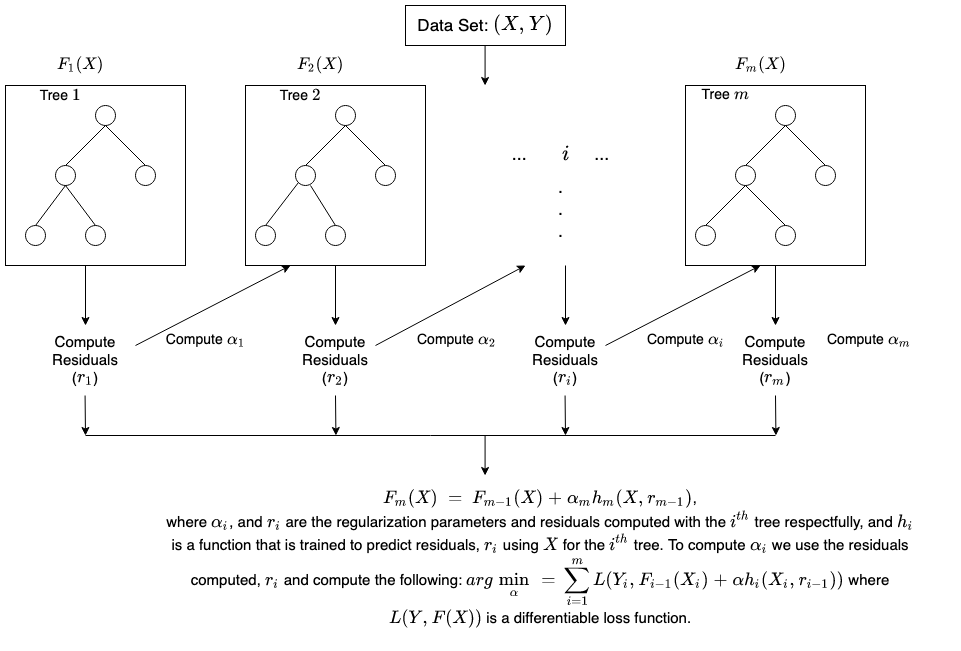

[Figure Source](https://docs.aws.amazon.com/pt_br/sagemaker/latest/dg/xgboost-HowItWorks.html)

In [74]:
xgb = XGBClassifier(random_state=0)
xgb.fit(df[vars], df['arrival_delay'])

# Saving the alternative model only to compare results
pickle.dump(xgb, open('model2.pickle', 'wb'))
del xgb # free memory RAM
gc.collect()

233

Note: the Extreme Gradient Boost Classifier is a model based on random forest and with regularization fitting flow which results in a great metric of evaluate metrics. However, the interpretation of this model is more complexity and limited like observing important features and so on. Furthermore, the fit takes more than twice times of the SGDClassifier fit and because of this, making fine tuning would take much time and RAM memory (so it was considered only default configuration parameters).

Source of XGBoost Classifier package: https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

---
## **◼ Model Evaluation**

Next step is to evaluate the model with the test set. All metrics will be evaluate and the final of this section have some comments about it.

In [75]:
final_model = pickle.load(open('model.pickle', 'rb'))
parquet_file = pq.ParquetFile("test.parquet")

def EvaluateTest(model, parquet_file):
  '''
  Function that receives the model in pickle format and
  a parquet file with test preprocessed data.
  Returns three arrays:
    - predicted_proba: predicted probabilistic of the target for each observation
    - real_target:     the real target
    - predicted:       indicator of each class was predicted considering 50% of threshold
  '''

  predicted_proba = np.array([])
  real_target = np.array([])

  # reading test data in chunks and predict with the model
  for i in parquet_file.iter_batches():
    chunk_df = i.to_pandas()

    # Enconding the features
    chunk_df[encoder_target_list] = enc_target.transform(chunk_df[encoder_target_list])\
      .astype('float32')

    onehot_columns = pd.DataFrame(enc_hot.transform(chunk_df[encoder_onehot_list]).toarray(), dtype='bool')
    onehot_columns.columns = enc_hot.get_feature_names_out() # change column names
    chunk_df.drop(columns=encoder_onehot_list, inplace=True)
    chunk_df = chunk_df.reset_index(drop=True).join(onehot_columns.astype('bool'))
    del onehot_columns

    # Normalization of the features
    chunk_df[scale_maxabs_list] = scale_maxabs.transform(chunk_df[scale_maxabs_list])
    chunk_df[scale_minmax_list] = scale_minmax.transform(chunk_df[scale_minmax_list])

    # Predict the chunk
    X_partial = chunk_df[vars]
    predicted_proba = np.concatenate((predicted_proba, model.predict_proba(X_partial)[:,1]), axis=None)
    real_target = np.concatenate((real_target,chunk_df['arrival_delay']), axis=None)

  # Getting indicator of arrival delay with 50% of threshold
  predicted = (predicted_proba>0.5).astype(int)

  return predicted_proba, real_target, predicted

predicted_proba, real_target, predicted = EvaluateTest(final_model, parquet_file)

In [76]:
print('Logistic Regression model metrics with 50% threshold:\n')
print(f'\tTrue positive rate (TPR)/recall/sensitivity: {recall_score(real_target, predicted)}')
print(f'\tF1-Score: {f1_score(real_target, predicted)}')
print(f'\tROC-AUC: {roc_auc_score(real_target, predicted_proba)}')
print(f'\tAccuracy:{accuracy_score(real_target, predicted)}')
print(f'\tPositive predictive value (PPV)/precision: {precision_score(real_target, predicted)}')

Logistic Regression model metrics with 50% threshold:

	True positive rate (TPR)/recall/sensitivity: 0.9117115795457671
	F1-Score: 0.9123243240763467
	ROC-AUC: 0.9754068653162551
	Accuracy:0.9729865537025023
	Positive predictive value (PPV)/precision: 0.9129378927894304


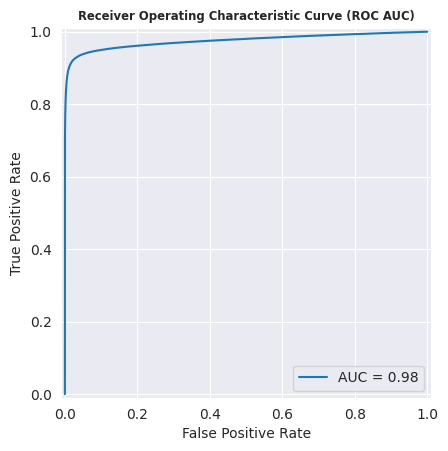

In [77]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(real_target, predicted_proba)
roc_auc = auc(fpr, tpr)
ROC_plot = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
ROC_plot.plot()
plt.title('Receiver Operating Characteristic Curve (ROC AUC)', fontweight='bold', fontsize='small')
plt.show()

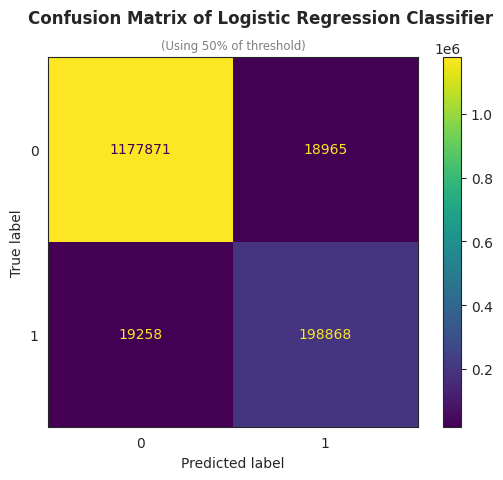

In [78]:
# Plotting confusion matrix of Logistic Regression model
sns.set_style('white')
cm = confusion_matrix(real_target, predicted, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot(values_format='') # unable scientific notation
plt.suptitle('Confusion Matrix of Logistic Regression Classifier', fontweight='bold')
plt.title('(Using 50% of threshold)', color='grey', fontsize='small')
plt.show()

Looking at this metrics, it's possible to ensure that the model has a sensitivity of almost 91,2% which means that more than 90% of delayed arrival flights are correctly predicted (by making a fit of model to predict the three last months of the year). The precision of the model was good too, resulting about 91,3%. Notice that the flights with false predicted arrival delayed are less important that not predicted a flight delayed, thinking in this business problem.

By looking at the ROC curve it's possible to determine another threshold to increase the sensitivity for instance, but consenquently also increase the false positive rate.

---
Now let's see the performance of XGBoost alternative model only to comparing results:

In [79]:
alt_model = pickle.load(open('model2.pickle', 'rb'))
predicted_proba2, _, predicted2 = EvaluateTest(alt_model, parquet_file)

print('XGBoost model metrics with 50% threshold:\n')
print(f'\tTrue positive rate (TPR)/recall/sensitivity: {recall_score(real_target, predicted2)}')
print(f'\tF1-Score: {f1_score(real_target, predicted2)}')
print(f'\tROC-AUC: {roc_auc_score(real_target, predicted_proba2)}')
print(f'\tAccuracy:{accuracy_score(real_target, predicted2)}')
print(f'\tPositive predictive value (PPV)/precision: {precision_score(real_target, predicted2)}')

XGBoost model metrics with 50% threshold:

	True positive rate (TPR)/recall/sensitivity: 0.9239613801197473
	F1-Score: 0.9555576101103059
	ROC-AUC: 0.9901052645537506
	Accuracy:0.9867508809423857
	Positive predictive value (PPV)/precision: 0.989391313739255


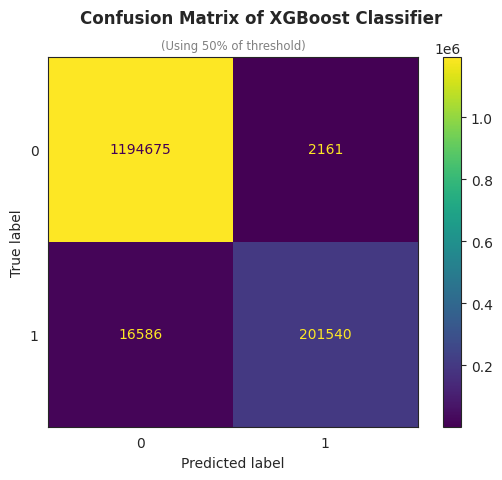

In [80]:
# Plotting confusion matrix of XGBoost standard model
cm = confusion_matrix(real_target, predicted2, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot(values_format='') # unable scientific notation
plt.suptitle('Confusion Matrix of XGBoost Classifier', fontweight='bold')
plt.title('(Using 50% of threshold)', color='grey', fontsize='small')
plt.show()

Observation: The XGboost algorithm are really powerful, but has more hyperparameters and memory usage to fit. In addition to it, this model is less interpretable than the chosen model of Logistic Regression, beacause it's a ensemble model based on random forest.

---
##**⭐ Insights**

Let's look at outliers of the model, and interpretation of the parameters to gain some insights.

**<h4>✖ Outliers detection</h4>**

We can use pearson residuals which are calculate by:

$$r_i = \frac{y_i - \pi_i}{\sqrt{\pi_i(1-\pi_i)}}$$

where $\pi_i$ is the predicted probability of obsevation i is in class 1 (delayed arrival) and $y_i$ is the true response.

This type of residual helps to identify huge oscilations and with an example, there is a notorious outlier of the model in the chart below.

Note: Some other residuals, like deviance residuals and standarized pearson residuals can be find in the lecture _**Introduction to linear regression analysis**, Douglas C. Montgomery, Elizabeth A. Peck, G. Geoffrey
Vining. – 5th ed., section 13.2.5_.

[]

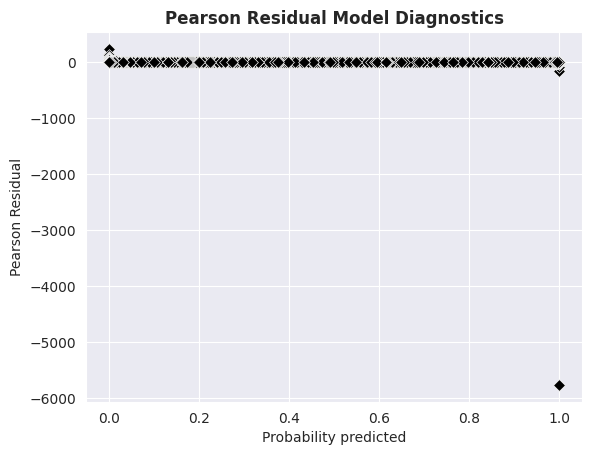

In [81]:
# Calculate pearson residual
pearson_resid = (real_target - predicted_proba)/np.sqrt(predicted_proba*(1-predicted_proba))

sns.set_style('darkgrid')
sns.scatterplot(y=pearson_resid, x=predicted_proba, color='black', marker='D')
plt.title('Pearson Residual Model Diagnostics', fontweight='bold')
plt.xlabel('Probability predicted')
plt.ylabel('Pearson Residual')
plt.plot()

In [82]:
# getting outlier identified with huge pearson residual about -7000
outlier = pearson_resid[pearson_resid<-1000]

idx_outlier = np.where(pearson_resid == outlier)[0][0]

print('--Outlier Identified:\n')
for iter, chunk in enumerate(parquet_file.iter_batches()):
  chunk_df = chunk.to_pandas()
  if iter==0:
    first_index = chunk_df.index[0]
  try:
    print(chunk_df.loc[first_index+idx_outlier,:])
    break
  except:
    pass

--Outlier Identified:

month                                11
day                                   3
day_of_week                           2
airline                              VX
flight_number                       969
tail_number                      N282VA
distance                            447
origin_airport                      SAN
destination_airport                 SFO
arrival_delay                     False
departure_delay                   184.0
taxi_out                             10
scheduled_time                      285
air_system_delay                    0.0
security_delay                      0.0
airline_delay                       0.0
late_aircraft_delay                 0.0
weather_delay                       0.0
route                            SANSFO
scheduled_departure_thirdhour         1
scheduled_departure_hour             20
scheduled_departure_dayperiod     night
departure_time_thirdhour              1
departure_time_hour                  23
departure_time_da

The highlighted outlier shows that is a trip with a large time of departure delay and with a small distance, but with big scheduled time to the trip and it is a not delayed arrival flight. In the subsection below will be discuss the importance of each feature in this forecast model.

[]

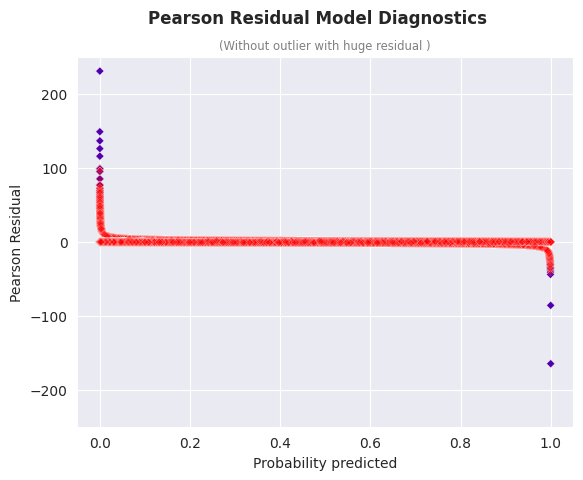

In [83]:
sns.scatterplot(y=pearson_resid, x=predicted_proba, color='blue', marker='D', size=.5, legend=False)
p = sns.scatterplot(y=pearson_resid, x=predicted_proba, alpha=0.3, size=.5, color='red',marker='D', legend=False)
p.set_ylim(bottom=-250, top=250)
plt.suptitle('Pearson Residual Model Diagnostics', fontweight='bold')
plt.title('(Without outlier with huge residual )', color='grey', fontsize='small')
plt.xlabel('Probability predicted')
plt.ylabel('Pearson Residual')
plt.plot()

**<h4>🏆 Importance of the features</h4>**

The Logistic Regression trained enable to interpret the coefficients of the features and than analyse each importance in the prediction.

The following chart shows the value of linear coefficients for each features (omitted that ones with value equals zero). We can notice that some features don't appears in the chart, because the regularization tuning penalyse that ones insignificant in the requested forecast.

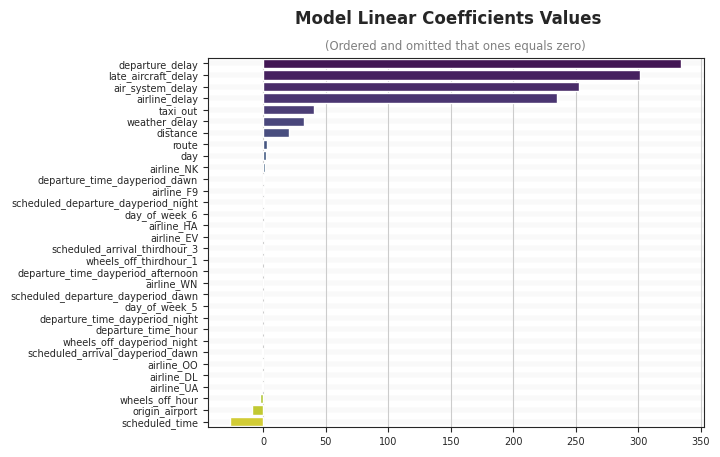

In [84]:
# plotting value of the features coefficient
sns.set_style('ticks')
features_name = final_model.feature_names_in_[(final_model.coef_!=0).tolist()[0]]

features_coef = final_model.coef_[(final_model.coef_!=0).tolist()]

pal = sns.color_palette("viridis", len(features_coef))
rank = features_coef.argsort()  # http://stackoverflow.com/a/6266510/1628638
sns.barplot(y=features_name[rank[::-1]], x=features_coef[rank[::-1]], palette=np.flip(np.array(pal[::-1]), axis=0), orient='h')
plt.suptitle('Model Linear Coefficients Values', fontweight='bold')
plt.title('(Ordered and omitted that ones equals zero)', color='grey', fontsize='small')
plt.tick_params(labelsize=7)
plt.grid(visible=True, which='major', axis='y', linewidth=4, alpha=0.1)
plt.grid(visible=True, which='major', axis='x')
plt.show()

The logistic model consists in a linear predictor and a logistic function (sigmoid) to converge into the range [0,1]. So it is:

$$\mathbb{E}(y_i) = \pi_i = \frac{1}{1+e^{-\omegaᵀ\textbf{x}_i}}$$

where $\textbf{x}_i$ is a vector with features (and indicator of bias) of i input and $\omegaᵀ$ is the coefficients of the model. Or:

$$\text{odds delay}_i=\frac{\pi_i}{1-\pi_i} = e^{\omegaᵀ\textbf{x}_i}$$

And $\text{OR delay}_{i,j} = \frac{\text{odds delay}_i}{\text{odds delay}_j} = \frac{e^{\omegaᵀ\textbf{x}_i}}{e^{\omegaᵀ\textbf{x}_j}}$ is the odds ratio between observation i and j.

So, based on this, let's suppose two observations with all the features identical except the departure_delay where the observation i has one more unit of minutes than the observation j. Then: $\text{OR delay}_{i,j} = e^{\omega_{\text{departure_delay}}}$, i.e. the increase of one minute in departure delay presents a odds of delay $e^{\omega_{\text{departure_delay}}}$ times the odds of delay without this minute increased.  



In [85]:
print('✴ Odds of delay with one minute of departure delay more increase: ',
      np.exp(features_coef[(features_name=='departure_delay')])[0])

✴ Odds of delay with one minute of departure delay more increase:  1.4922592627035567e+145


In [86]:
print('✴ Odds of delay with one less minute of scheduled time of the trip increase: ',
      1/np.exp(features_coef[(features_name=='scheduled_time')])[0])

✴ Odds of delay with one less minute of scheduled time of the trip increase:  268314940149.6749


These huge values show the importance of the features of departure delay and scheduled time in the forecast of the model. It shows that the flights with big scheduled time of the trip tends to don't delay the arrival.

Let's suppose a trip with identical features but with airline NK (Spirit Air Lines) versus a observation with ariline HA (Hawaiian Airlines Inc.) so, the odds of delay for the first one is equals to $e^{\omega_{\text{airline_NK}}-\omega_{\text{airline_HA}}}$ times the second one.

✴ So, looking at the calculus below, the odd of flight delay with NK airline increase 70% if considering the odd of delay in HA airline.

In [87]:
print('Odds of delay with airline NK versus airline HA is: ',
      np.exp(features_coef[(features_name=='airline_NK')]-features_coef[(features_name=='airline_HA')])[0])

Odds of delay with airline NK versus airline HA is:  1.7057869917515118


In [88]:
np.exp(features_coef[(features_name=='scheduled_arrival_dayperiod_dawn')])[0]

0.4832200962736497

✴ The odd of delay in a flight with scheduled arrival time in day period different of dawn is almost twice the odd in period of dawn based on the model.

---
## **🚀 Improvements and Final Comments**

It's recommended to work with more feature enginnering like considering states and cities of the flights route, and create anothers features to try to improve the metrics of the model.

The XGBoost could be used for better forecast, but loses in terms of interpretability. However, it's possible to combine the features interpretations of the Logistic Regression model to use as input in the XGBoost and see if improved the performance.

Finally, considering a bussiness problem with required interpretation of decisions, the chosen model had a great utility. Furthermore, considering analyse the others outliers can help to adjust the model and upgrade evaluation metrics.